# Analysis for once-through scenarios
This notebook provides analysis for all of the once-through fuel cycle scenarios that are included in 
Amanda Bachmann's dissertation. Analysis of each scenario includes the number of reactors deployed, the uranium resources, the SWU capacity, and the amount of waste produced. 

Scenarios are numbers as follows:
* 1: LWRs
* 2: MMR, no growth
* 3: Xe-100, no growth
* 4: Xe-100 and MMR, no growth
* 5: MMR and VOYGR, no growth
* 6: Xe-100 and VOYGR, no growth
* 7: Xe-100, MMR, and VOYGR, no growth
* 8: MMR, 1% growth
* 9: Xe-100, 1% growth
* 10: Xe-100 and MMR, 1% growth
* 11: MMR and VOYGR, 1% growth
* 12: Xe-100 and VOYGR, 1% growth
* 13: Xe-100, MMR, and VOYGR, 1% growth

Analysis of scenario 1 is performed separately, then the no growth scenarios are all analyzed together, followed by the 1% growth scenarios. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

import cymetric as cym
sys.path.insert(0,'../../../scripts')
import transition_metrics as tm
import dataframe_analysis as dfa

In [2]:
# Enrichment Constants
assays = {'LWR': 0.043, 'MMR':0.1975, 'Xe-100':0.155, 
          'VOYGR':0.0409, 'feed':0.00711,'tails':0.002}

# Reactor Deployment Constants
non_lwr = ['Sink_HLW', 'Sink_LLW', 'Mine',
                 'Enrichment', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
                 'MMR', 'Xe-100','VOYGR', 'Xe-100CoolingPool',
                 'MMRCoolingPool', 'VOYGRCoolingPool']
adv_rxs = ['MMR', 'Xe-100', 'VOYGR']

#Plotting orders
plotting_order_nogrowth = ['s5','s2','s6','s7','s4','s3']
plotting_order_1percent = ['s11','s08','s12','s13','s10','s09']
colors = {'s2':'tab:orange', 's3':'tab:purple','s4':'tab:brown',
                   's5':'tab:blue', 's6':'tab:red', 's7':'tab:green',
                   's08':'tab:orange', 's09':'tab:purple','s10':'tab:brown',
                   's11':'tab:blue', 's12':'tab:red', 's13':'tab:green'}
lines = {'s2':(0,(3,5,1)), 's3':(0,(5,3)),'s4':'-.','s5':(0,(5,1)), 's6':(0,(5,5)), 's7':(0, (3,1,1,1)),
                's08':(0,(3,5,1)), 's09':(0,(5,3)),'s10':'-.','s11':(0,(5,1)), 's12':(0,(5,5)), 's13':(0, (3,1,1,1))}
labels = {'s2':'Scenario 2', 's3':'Scenario 3', 's4':'Scenario 4', 's5':'Scenario 5',
         's6':'Scenario 6', 's7':'Scenario 7', 's08':'Scenario 8', 's09':'Scenario 9',
         's10':'Scenario 10', 's11':'Scenario 11', 's12':'Scenario 12', 's13':'Scenario 13'}
legend_order = [1, 5, 4, 0, 2, 3]

# Mass fraction of uranium in fuel for each type of reactor
uranium_fractions = {'LWR':1, 'MMR':0.881481, 'Xe-100':0.895285, 'VOYGR':0.881481}
uox_commodity = {'LWR':'fresh_uox', 'MMR':'fresh_MMR_uox',
                   'Xe-100':'fresh_uox', 'VOYGR':'fresh_uox'}

#Waste commodity names for each type of reactor
waste_commodity = {'LWR':'spent_uox', 'MMR':'spent_MMR_haleu',
                   'Xe-100':'spent_xe100_haleu', 'VOYGR':'spent_smr_fuel'}

#Time period
time = np.linspace(2025, 2089, 65)

## Scenario 1

In [201]:
s1_outfile = "../outputs/united_states_2020.sqlite"

In [202]:
# Reactor Deployment
s1_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine',
                 'Enrichment', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA']
s1_reactors = tm.get_lwr_totals(s1_outfile, s1_nonlwr)
s1_reactors = dfa.add_year(s1_reactors)

In [203]:
s1_metrics = tm.get_metrics(s1_outfile)
s1_agents = s1_metrics.eval("Agents")
s1_lwrs = s1_agents.loc[s1_agents['Spec'] == ':cycamore:Reactor']

In [204]:
print('Total Number of LWRs deployed:', len(s1_lwrs))
print('Max LWRs deployed:', s1_reactors['lwr_total'].max())
print('LWRS deployed in January 2025:', s1_reactors['lwr_total'][721])
print(s1_reactors[['lwr_total','Year']][1087:1091])
print(s1_reactors[['lwr_total','Year']][30:35])

Total Number of LWRs deployed: 115
Max LWRs deployed: 109.0
LWRS deployed in January 2025: 92.0
Prototype  lwr_total     Year
1087             1.0  2055.58
1088             1.0  2055.67
1089             1.0  2055.75
1090             0.0  2055.83
Prototype  lwr_total     Year
30               0.0  1967.50
31               0.0  1967.58
32               2.0  1967.67
33               2.0  1967.75
34               2.0  1967.83


In [205]:
#energy
s1_energy = tm.get_annual_electricity(s1_outfile)
s1_energy[55:60]

,Year,Energy
55,2022,88.511612
56,2023,88.511612
57,2024,88.423739
58,2025,87.198156
59,2026,86.325454


Annual electricity for 2025:89.45655 GWe-yr


Monthly electricity for 2025:
* January: 91.448
* February: 91.412
* March: 91.376
* April: 89.396
* May: 88.573
* June: 89.3
* July: 91.130
* August: 84.061
* Spetember: 86.184
* October: 91.514
* November:90.791
* December: 83.104

In [206]:
#Compare simulated LWR energy to actual
energy = pd.read_csv("../../../database/MER_T07_02A.csv", usecols=[1,2,3])
energy = energy.loc[(energy['Column_Order'] == 5)].reset_index()
energy = energy.astype('float64')
energy['YYYYMM'] = energy['YYYYMM'].map(str)
actual_energy = []
for index, row in enumerate(energy['YYYYMM']):
    if row[4:] == '13.0':
        actual_energy.append(energy['Value'][index]*1.14155e-4)

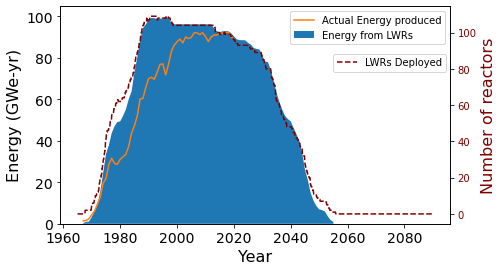

In [207]:
#combine energy and reactors for scenario 1 into a single plot
fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(111)
ax1.stackplot(s1_energy['Year'], s1_energy['Energy'], labels=['Energy from LWRs'])
ax1.plot(s1_energy['Year'][:54], actual_energy[19:], label='Actual Energy produced')
ax1.legend()
ax1.set_ylabel('Energy (GWe-yr)', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(s1_reactors['Year'], s1_reactors['lwr_total'], 'maroon', 
         linestyle='--', label='LWRs Deployed')
ax2.legend(loc=(0.7, 0.7))
ax2.set_ylabel('Number of reactors', color='maroon', fontsize=16)
ax2.tick_params(axis='y', labelcolor='maroon')

ax1.set_xlabel('Year', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
plt.savefig('figures/s1_energy_reactors.pdf', bbox_inches='tight')

Text(0, 0.5, 'Energy (GWe-yr)')

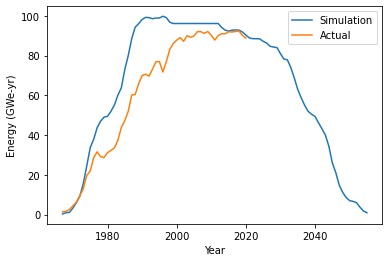

In [208]:
plt.plot(s1_energy['Year'], s1_energy['Energy'], label='Simulation')
plt.plot(s1_energy['Year'][:54], actual_energy[19:], label='Actual')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Energy (GWe-yr)')

In [209]:
s1_transactions = tm.add_receiver_prototype(s1_outfile)

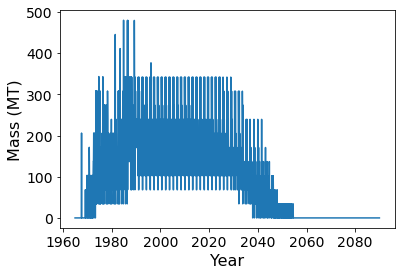

In [210]:
#Uranium resources sent to reactors
s1_uox = dfa.commodity_mass_traded(s1_transactions, 'fresh_uox')
plt.plot(s1_uox['Year'], s1_uox['Quantity']/1000)
plt.ylabel('Mass (MT)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/s1_uox.pdf', bbox_inches='tight')

In [211]:
print('Max uranium:',s1_uox['Quantity'].max()/1000)
print('Average across entire time:',s1_uox['Quantity'][32:1089].mean()/1000)
print('Average after 2025:',s1_uox['Quantity'][721:1089].mean()/1000)
print('Average before 2025:',s1_uox['Quantity'][32:721].mean()/1000)
print('Total after 2025:', s1_uox['Quantity'][721:].cumsum()[1499]/1000)
print('Total:', s1_uox['Quantity'].cumsum()[1499]/1000)

Max uranium: 479.95435684646645
Average across entire time: 135.64548926932432
Average after 2025: 81.48204943171557
Average before 2025: 164.5745834061023
Total after 2025: 29985.394190871393
Total: 143377.28215767496


1150385.2384471095


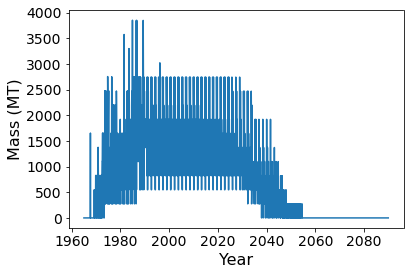

In [213]:
#Natural uranium needed
s1_tails = dfa.calculate_tails(s1_uox['Quantity'], assays['LWR'], assays['tails'], assays['feed'])
s1_feed = dfa.calculate_feed(s1_uox['Quantity'], s1_tails)
print(s1_feed.cumsum()[1499]/1000)

plt.plot(s1_uox['Year'], s1_feed/1000)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mass (MT)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figures/s1_feed.pdf', bbox_inches='tight')

In [214]:
print('Maximum needed:',s1_feed.max()/1000)
print('Average feed:',s1_feed[32:1089].mean()/1000)
print('Average feed after 2025:', s1_feed[721:1089].mean()/1000)
print('Average feed before 2025:', s1_feed[32:721].mean()/1000)
print('Total after 2025:', s1_feed[721:].cumsum()[1499]/1000)
print('Total:', s1_feed.cumsum()[1499]/1000)

Maximum needed: 3850.905798572431
Average feed: 1088.3493268184534
Average feed after 2025: 653.7698682388136
Average feed before 2025: 1320.4614324168674
Total after 2025: 240587.31151188293
Total: 1150385.2384471095


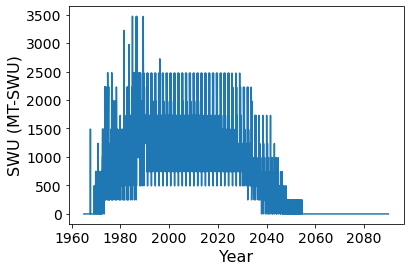

In [215]:
# SWU capacity 
s1_swu = dfa.calculate_SWU(s1_uox['Quantity'], assays['LWR'], s1_tails, 
                          assays['tails'], s1_feed, assays['feed'])
plt.plot(s1_uox["Year"], s1_swu/1000)
plt.xlabel('Year', fontsize=16)
plt.ylabel('SWU (MT-SWU)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figures/s1_swu.pdf', bbox_inches='tight')

In [216]:
print('Maximum needed:',s1_swu.max()/1000)
print('Average SWU:',s1_swu[32:1089].mean()/1000)
print('Average SWU after 2025:', s1_swu[721:1089].mean()/1000)
print('Average SWU before 2025:', s1_swu[32:721].mean()/1000)

Maximum needed: 3470.057313554395
Average SWU: 980.7133019531188
Average SWU after 2025: 589.1130636082011
Average SWU before 2025: 1189.8698878906073


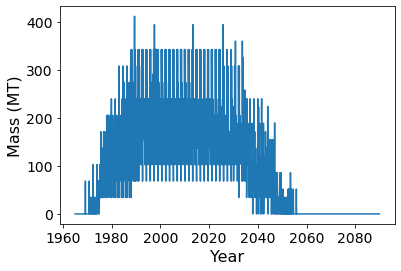

In [218]:
# waste discharged
s1_waste = dfa.commodity_mass_traded(s1_transactions, 'spent_uox')

plt.plot(s1_waste['Year'], s1_waste['Quantity']/1000)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mass (MT)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/s1_waste.pdf', bbox_inches='tight')

In [219]:
print('Maximum needed:',s1_waste['Quantity'].max())
print('Average waste:',s1_waste['Quantity'][32:1089].mean())
print('Average waste after 2025:', s1_waste['Quantity'][721:1089].mean())
print('Average waste before 2025:', s1_waste['Quantity'][32:721].mean())
print('Cumulative:', s1_waste['Quantity'].cumsum()[1499]/1000)

Maximum needed: 411145.2282157625
Average waste: 130016.69172519061
Average waste after 2025: 94269.9463287027
Average waste before 2025: 149109.2930400057
Cumulative: 137479.3568464718


## No growth scenarios

In [3]:
out_files_nogrowth = {'s2_outfile':"../outputs/scenario2.sqlite",
            's3_outfile':"../outputs/scenario3.sqlite",
            's4_outfile':"../outputs/scenario4.sqlite",
            's5_outfile':"../outputs/scenario5.sqlite",
            's6_outfile':"../outputs/scenario6.sqlite",
            's7_outfile':"../outputs/scenario7.sqlite"}

### Reactor Numbers

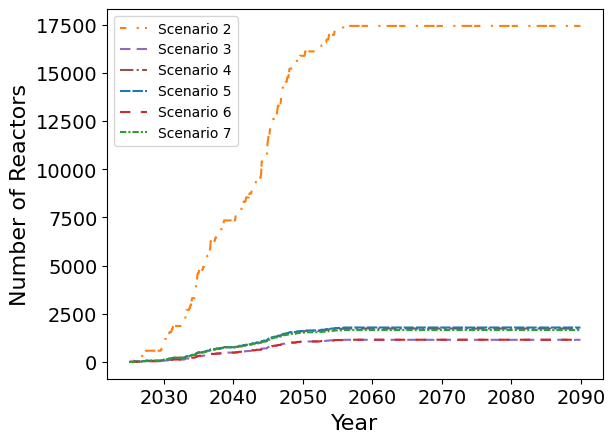

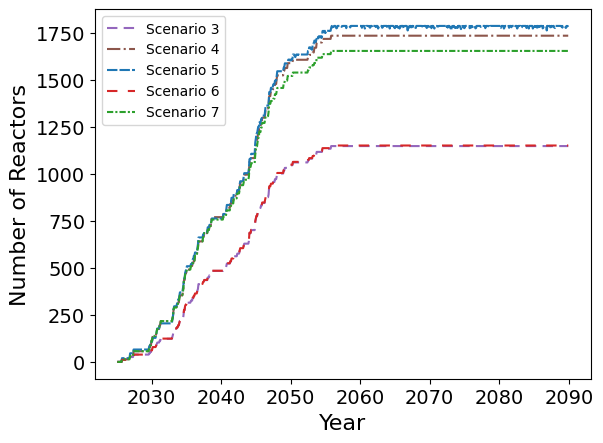

In [4]:
reactors_nogrowth = {'s2_reactors':'',
            's3_reactors':"",
            's4_reactors':"",
            's5_reactors':"",
            's6_reactors':"",
            's7_reactors':""}
plt.figure(0)
for key in reactors_nogrowth:
    scenario = key[:2]
    reactors_nogrowth[key] = tm.get_prototype_totals(out_files_nogrowth[scenario+'_outfile'], non_lwr, adv_rxs)
    plt.plot(reactors_nogrowth[key]['Year'][721:], reactors_nogrowth[key]['advrx_total'][721:], 
             label=labels[scenario],
            color = colors[scenario], linestyle=lines[scenario])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Reactors', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig('figures/nogrowth_reactors.pdf', bbox_inches='tight')

plt.figure(1)
for key in ['s3_reactors','s4_reactors','s5_reactors','s6_reactors','s7_reactors']:
    scenario = key[:2]
    #reactors_nogrowth[key] = tm.get_prototype_totals(out_files_nogrowth[scenario+'_outfile'], non_lwr, adv_rxs)
    plt.plot(reactors_nogrowth[key]['Year'][721:], reactors_nogrowth[key]['advrx_total'][721:], 
            label=labels[scenario],
            color=colors[scenario], linestyle=lines[scenario])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Reactors', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig('figures/nogrowth_reactors_3-7.pdf', bbox_inches='tight')

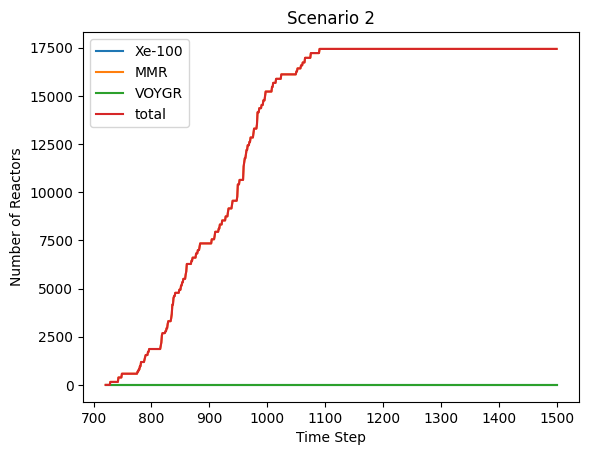

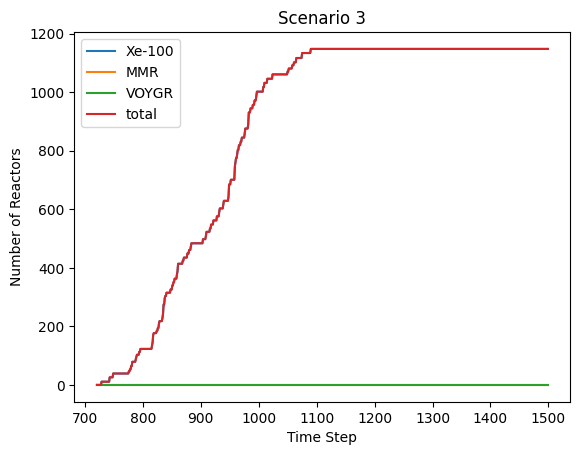

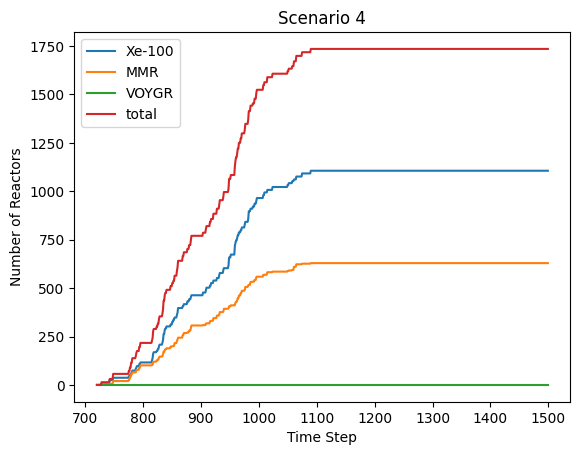

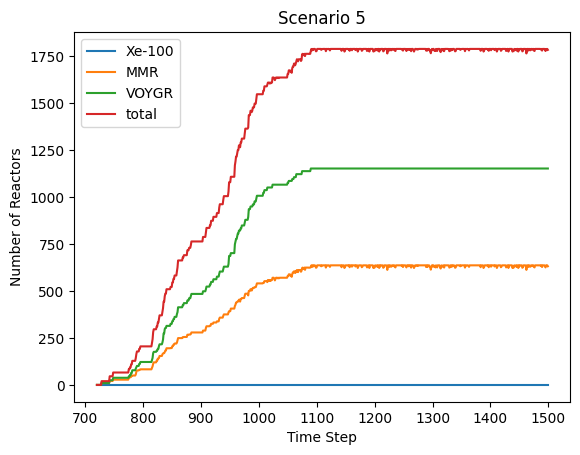

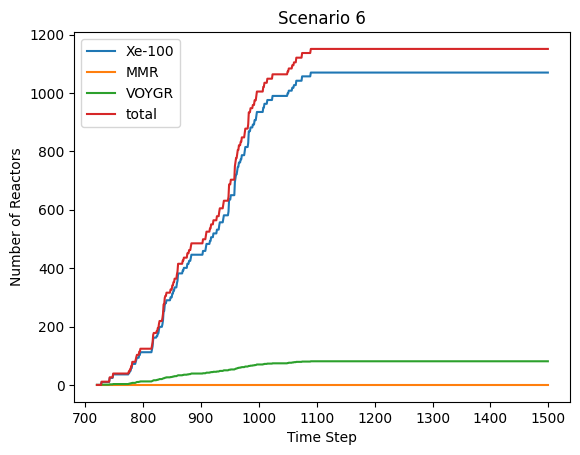

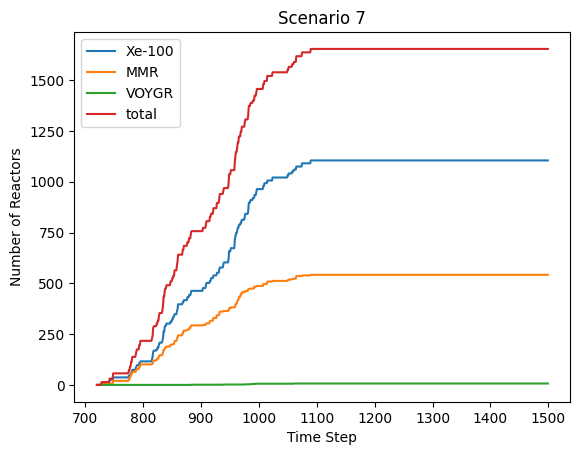

In [5]:
for scenario in ['s2', 's3','s4','s5','s6','s7']:
        plt.figure()
        for reactor in ['Xe-100', 'MMR', 'VOYGR']:
            num_rxs = reactors_nogrowth[scenario+'_reactors'][reactor+'_total']
            plt.plot(num_rxs[721:], label = reactor)
        plt.plot(reactors_nogrowth[scenario+'_reactors']['advrx_total'][721:], label='total')
        plt.legend()
        plt.title(labels[scenario])
        plt.xlabel('Time Step')
        plt.ylabel('Number of Reactors')

In [6]:
for key in reactors_nogrowth:
    scenario = key[1]
    for adv_rx in adv_rxs:
        print(f'Max {adv_rx} in S{scenario}:', reactors_nogrowth[key][adv_rx +'_total'].max())
        print(f'Max {adv_rx} added in one step in S{scenario}:', reactors_nogrowth[key][adv_rx +'_enter'].max())
        prototype_sum = reactors_nogrowth[key][adv_rx +'_enter'].cumsum()
        print(f'Total number of {adv_rx} deployed in S{scenario}:', prototype_sum.iloc[-1])
    print(f'Max Adv Rx in S{scenario}:', reactors_nogrowth[key]['advrx_total'].max())
    print(f'Max Adv Rx added in one step in S{scenario}:', reactors_nogrowth[key]['advrx_enter'].max())
    advrx_sum = reactors_nogrowth[key]['advrx_enter'].cumsum()
    print(f'Total number of reactors deployed in S{scenario}:', advrx_sum.iloc[-1])  

Max MMR in S2: 17440.0
Max MMR added in one step in S2: 856.0
Total number of MMR deployed in S2: 51568.0
Max Xe-100 in S2: 0.0
Max Xe-100 added in one step in S2: 0.0
Total number of Xe-100 deployed in S2: 0.0
Max VOYGR in S2: 0.0
Max VOYGR added in one step in S2: 0.0
Total number of VOYGR deployed in S2: 0.0
Max Adv Rx in S2: 17440.0
Max Adv Rx added in one step in S2: 856.0
Total number of reactors deployed in S2: 51568.0
Max MMR in S3: 0.0
Max MMR added in one step in S3: 0.0
Total number of MMR deployed in S3: 0.0
Max Xe-100 in S3: 1148.0
Max Xe-100 added in one step in S3: 46.0
Total number of Xe-100 deployed in S3: 1201.0
Max VOYGR in S3: 0.0
Max VOYGR added in one step in S3: 0.0
Total number of VOYGR deployed in S3: 0.0
Max Adv Rx in S3: 1148.0
Max Adv Rx added in one step in S3: 46.0
Total number of reactors deployed in S3: 1201.0
Max MMR in S4: 629.0
Max MMR added in one step in S4: 16.0
Total number of MMR deployed in S4: 1880.0
Max Xe-100 in S4: 1106.0
Max Xe-100 added in

In [202]:
for key in reactors_nogrowth:
    print(reactors_nogrowth[key]['advrx_total'].ne(0).idxmax())

729
729
729
729
729
729


### Energy

In [61]:
energy_nogrowth = {'s2_energy':'', 's3_energy':'', 's4_energy':'',
          's5_energy':'', 's6_energy':'', 's7_energy':''}
for key in energy_nogrowth:
    scenario = key[:2]
    energy_nogrowth[key] = tm.get_annual_electricity(out_files_nogrowth[scenario + '_outfile'])

(87.0, 88.0)

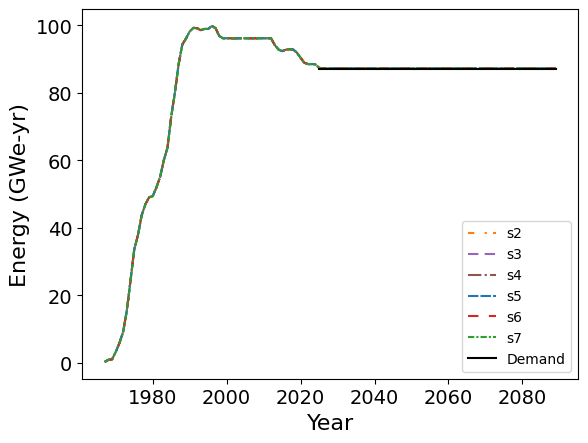

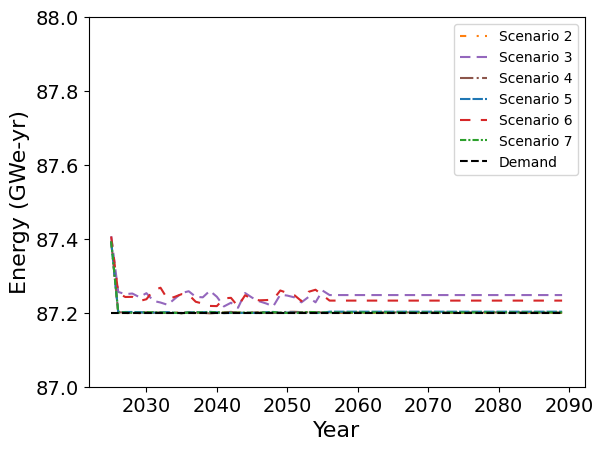

In [62]:
for key in energy_nogrowth:
    scenario = key[:2]
    
    plt.figure(0)
    plt.plot(energy_nogrowth[key]['Year'], energy_nogrowth[key]['Energy'], label=scenario,
            color=colors[scenario], linestyle=lines[scenario])
    
    plt.figure(1)
    plt.plot(energy_nogrowth[key]['Year'][58:], energy_nogrowth[key]['Energy'][58:], label=labels[scenario],
            color=colors[scenario], linestyle=lines[scenario])
plt.figure(0)
plt.plot(np.linspace(2025,2089,65), np.repeat(87.198156, 65), 'k', label='Demand')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Energy (GWe-yr)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig('figures/nogrowth_energy.pdf', bbox_inches='tight')

plt.figure(1)
plt.plot(np.linspace(2025,2089,65), np.repeat(87.198156, 65), 'k--', label='Demand')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Energy (GWe-yr)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.ylim([87, 88])
#plt.savefig('figures/nogrowth_energy_after_2025.pdf', bbox_inches='tight')

s2_energy : -0.1950003000000038 -1.2999999995599865e-05
s3_energy : -0.20900029999999958 -0.015390899999999874
s4_energy : -0.1950003000000038 -0.0004524000000003525
s5_energy : -0.1950003000000038 -0.0009364999999945667
s6_energy : -0.2082503000000031 -0.019140900000010674
s7_energy : -0.1950003000000038 -0.00075405000001183


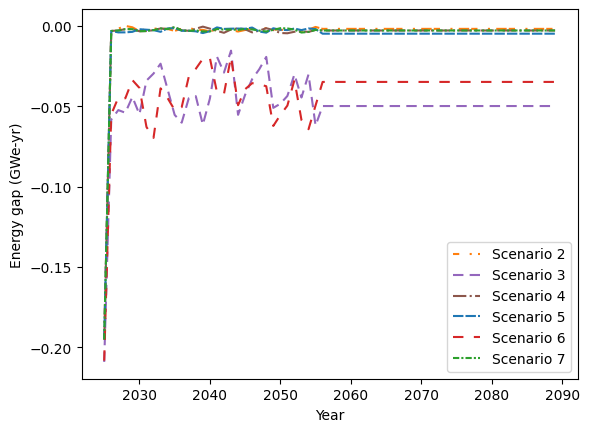

In [63]:
demand = np.repeat(87.198156,65)

for key in energy_nogrowth:
    scenario = key[:2]
    gap = demand-energy_nogrowth[key]['Energy'][58:]
    plt.plot(energy_nogrowth[key]['Year'][58:],gap, color = colors[scenario], linestyle = lines[scenario],
            label=labels[scenario])
    print(key, ':', gap.min(), gap.max())
plt.xlabel('Year')
plt.ylabel('Energy gap (GWe-yr)')
plt.legend()
plt.savefig('figures/nogrowth_energy_gap.pdf')

In [64]:
nogrowth_prototype_energy = {'s2_MMR':'', 's2_Xe-100':'', 's2_VOYGR':'', 's2_LWR':'',
                            's3_MMR':'', 's3_Xe-100':'', 's3_VOYGR':'', 's3_LWR':'',
                            's4_MMR':'', 's4_Xe-100':'', 's4_VOYGR':'', 's4_LWR':'',
                            's5_MMR':'', 's5_Xe-100':'', 's5_VOYGR':'', 's5_LWR':'',
                            's6_MMR':'', 's6_Xe-100':'', 's6_VOYGR':'', 's6_LWR':'', 
                            's7_MMR':'', 's7_Xe-100':'', 's7_VOYGR':'', 's7_LWR':''}

for scenario in ['s2','s3','s4','s5','s6','s7']:
    for reactor in ['MMR', 'Xe-100','VOYGR']:
        nogrowth_prototype_energy[scenario + '_' + reactor] = tm.get_prototype_energy(
                                                              out_files_nogrowth[scenario +'_outfile'], reactor)
    nogrowth_prototype_energy[scenario + '_LWR'] = tm.get_lwr_energy(out_files_nogrowth[scenario +'_outfile'], 
                                                                     ['MMR', 'Xe-100','VOYGR'])

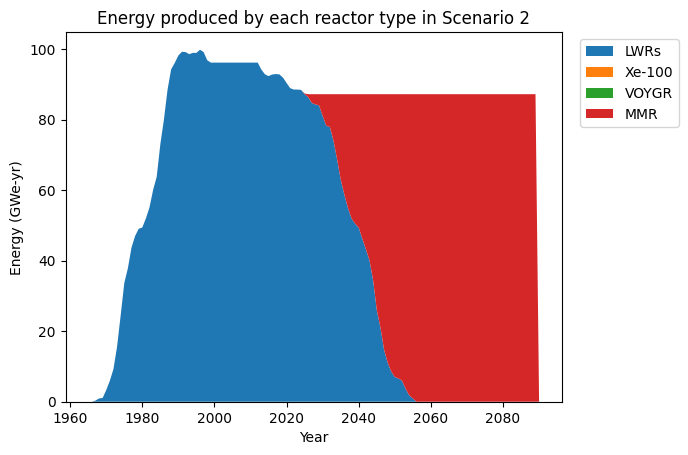

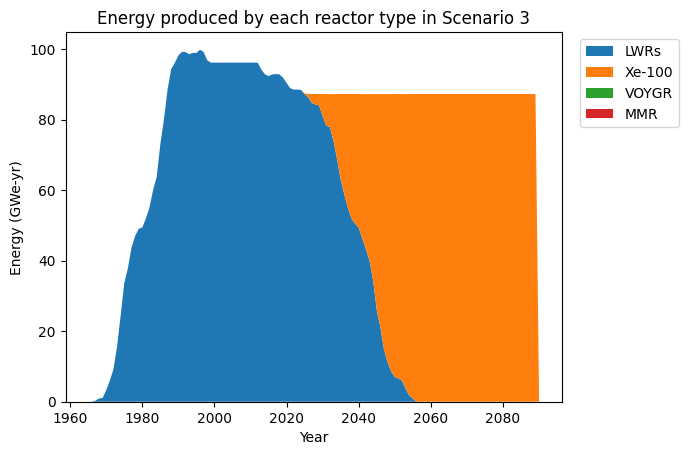

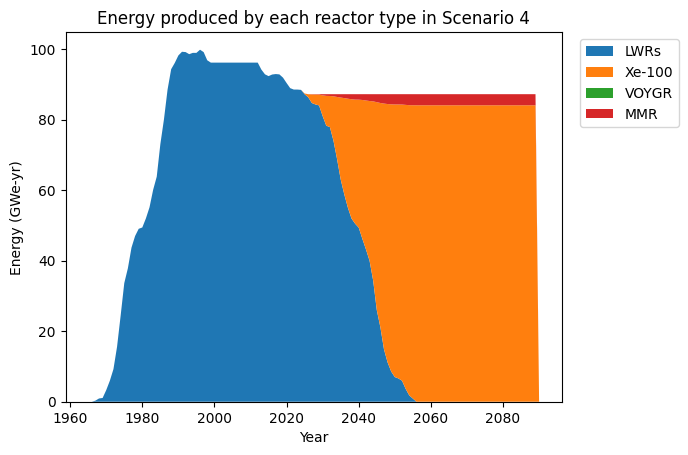

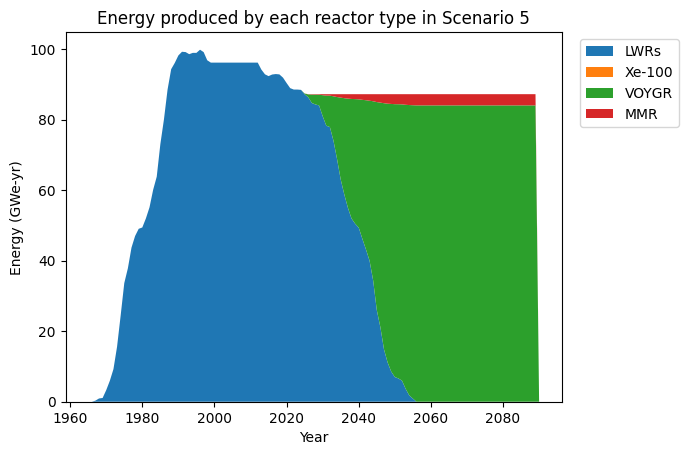

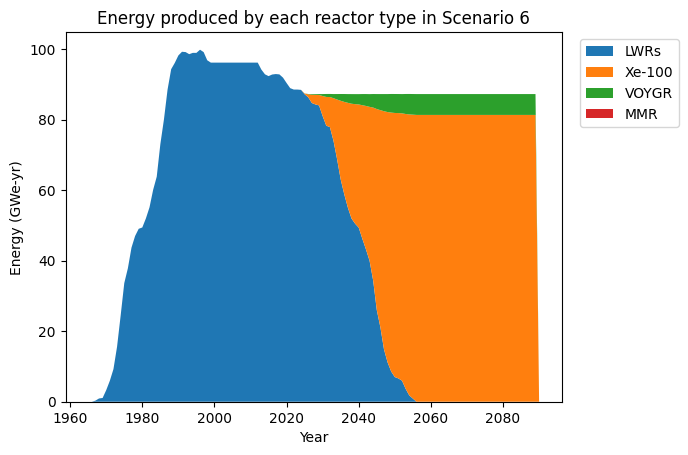

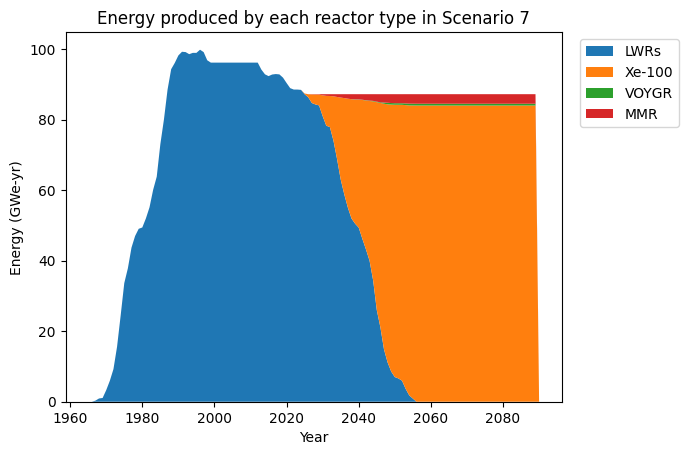

In [65]:
for scenario in ['s2','s3','s4','s5','s6','s7']:
    plt.figure()
    plt.stackplot(nogrowth_prototype_energy[scenario+'_LWR']['Year'], nogrowth_prototype_energy[scenario+'_LWR']['Energy'],
                 nogrowth_prototype_energy[scenario+'_Xe-100']['Energy'],nogrowth_prototype_energy[scenario+'_VOYGR']['Energy'],
                 nogrowth_prototype_energy[scenario+'_MMR']['Energy'], labels = ['LWRs','Xe-100','VOYGR','MMR'])
    plt.xlabel('Year')
    plt.ylabel('Energy (GWe-yr)')
    plt.title(f'Energy produced by each reactor type in {labels[scenario]}')
    plt.legend(bbox_to_anchor=(1.25, 1))
    plt.savefig(f'figures/prototype_energy_{scenario}.png', bbox_inches='tight')

### Fuel mass

In [16]:
transactions_nogrowth = {'s2':'','s3':'','s4':'','s5':'', 's6':'','s7':''}

for scenario in transactions_nogrowth:
    transactions_nogrowth[scenario] = tm.add_receiver_prototype(out_files_nogrowth[scenario + '_outfile'])

In [17]:
#Dividing fuel mass by prototype
uranium_to_reactors_nogrowth = {'s2_MMR':'', 's2_Xe-100':'', 's2_VOYGR':'', 's2_LWR':'', 's2_total':'',
                       's3_MMR':'', 's3_Xe-100':'', 's3_VOYGR':'', 's3_LWR':'', 's3_total':'',
                       's4_MMR':'', 's4_Xe-100':'', 's4_VOYGR':'', 's4_LWR':'', 's4_total':'',
                       's5_MMR':'', 's5_Xe-100':'', 's5_VOYGR':'', 's5_LWR':'', 's5_total':'',
                       's6_MMR':'', 's6_Xe-100':'', 's6_VOYGR':'', 's6_LWR':'', 's6_total':'',
                       's7_MMR':'', 's7_Xe-100':'', 's7_VOYGR':'', 's7_LWR':'', 's7_total':'',}
for key in uranium_to_reactors_nogrowth:
    scenario = key[:2]
    reactor = key[3:]
    if reactor == 'LWR':
        uranium_to_reactors_nogrowth[key] = dfa.commodity_to_LWR(transactions_nogrowth[scenario], 
                                                        uox_commodity[reactor], adv_rxs)
    elif reactor != 'total': 
        uranium_to_reactors_nogrowth[key] = dfa.commodity_to_prototype(transactions_nogrowth[scenario], 
                                                        uox_commodity[reactor], reactor)
        uranium_to_reactors_nogrowth[key]['Quantity'] = uranium_to_reactors_nogrowth[key]['Quantity']*uranium_fractions[reactor]

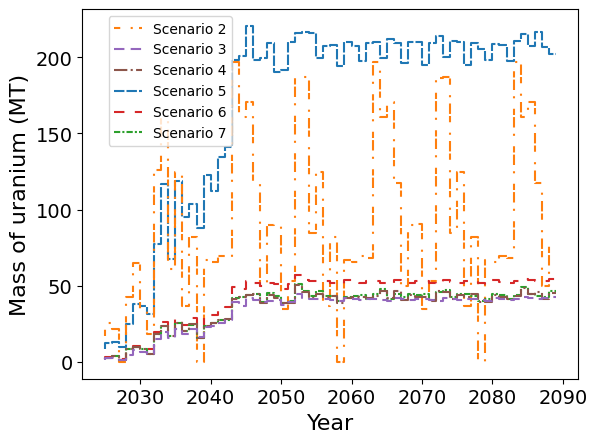

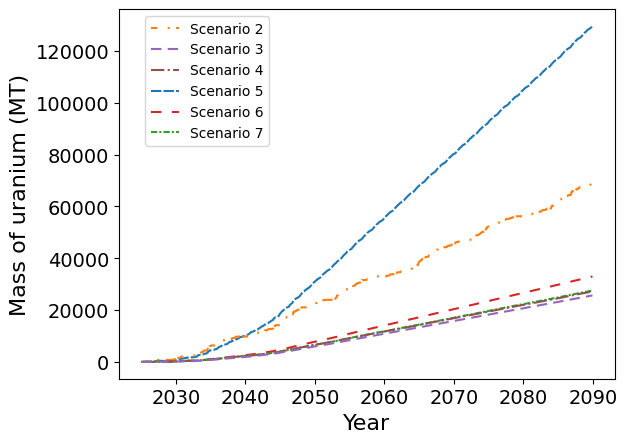

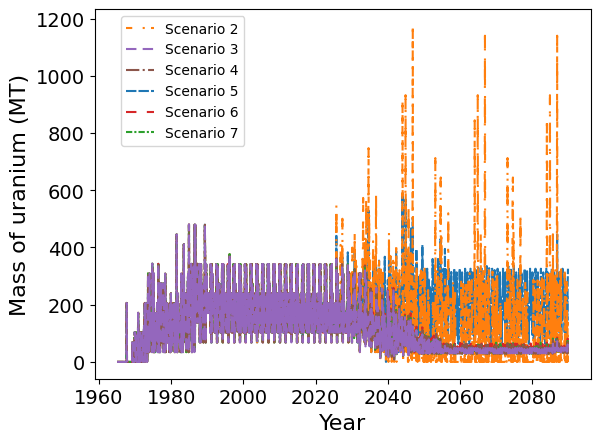

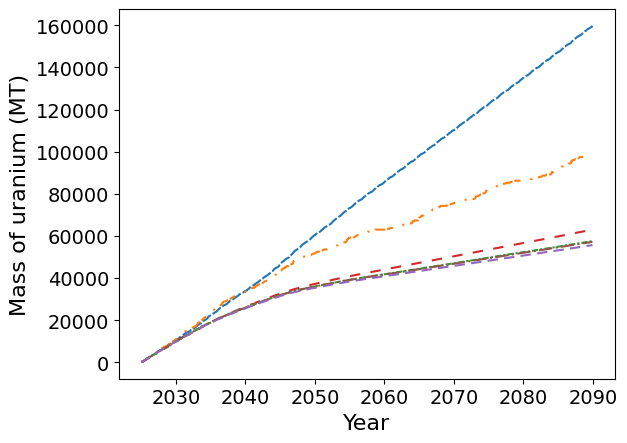

In [20]:
for key in plotting_order_nogrowth:
    ax1 = plt.figure(1)
    AR_uranium = uranium_to_reactors_nogrowth[key + '_MMR'].copy()
    for reactor in ['Xe-100', 'VOYGR']:
        AR_uranium['Quantity'] += uranium_to_reactors_nogrowth[key+'_'+reactor]['Quantity']     
    counter = 721
    averages = []
    for ii in range(0,65):
        year_data = AR_uranium['Quantity'][counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
    
    plt.figure(1)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key],
            color=colors[key], linestyle=lines[key]) 
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass of uranium (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    ax3 = plt.figure(3)
    plt.plot(uranium_to_reactors_nogrowth[key+'_MMR']['Year'][721:], 
            AR_uranium['Quantity'][721:].cumsum()/1000, label=labels[key],
            linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass of uranium (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    ax2 = plt.figure(2)
    uranium_to_reactors_nogrowth[key + '_total'] = AR_uranium['Quantity'] 
    uranium_to_reactors_nogrowth[key + '_total'] += uranium_to_reactors_nogrowth[key+'_LWR']['Quantity']
    plt.plot(AR_uranium['Year'], uranium_to_reactors_nogrowth[key+'_total']/1000, label=labels[key],
            linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass of uranium (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
handles, legend_labels = ax1.gca().get_legend_handles_labels()
ax1.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax1.savefig('figures/nogrowth_AR_uranium.pdf', bbox_inches='tight')
handles, legend_labels = ax2.gca().get_legend_handles_labels()
ax2.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax2.savefig('figures/nogrowth_uranium.pdf', bbox_inches='tight')
handles, legend_labels = ax3.gca().get_legend_handles_labels()
ax3.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax3.savefig('figures/nogrowth_uranium_cumulative.pdf', bbox_inches='tight')

In [31]:
#Reporting uranium masses
for scenario in transactions_nogrowth:
    HALEU_mass = uranium_to_reactors_nogrowth[scenario+'_MMR'] + uranium_to_reactors_nogrowth[scenario+'_Xe-100']
    print('Average HALEU mass in', scenario,'after 2025:', HALEU_mass[721:]['Quantity'].mean()/1000)
    AR_mass = HALEU_mass + uranium_to_reactors_nogrowth[scenario+'_VOYGR']
    print('Non-HALEU max in:',scenario, uranium_to_reactors_nogrowth[scenario+'_VOYGR'][721:]['Quantity'].max()/1000)
    print('Average mass in', scenario, 'after 2025:', 
          AR_mass[721:]['Quantity'].mean()/1000)
    print('Maximum mass in', scenario, 'after 2025:', 
          AR_mass[721:]['Quantity'].max()/1000)
    print('AR Cumulative mass in', scenario, 'after 2025:',AR_mass[721:]['Quantity'].cumsum()[1499]/1000)
    print("Cumulative HALEU mass needed by 20250 in ",scenario, ":", HALEU_mass[:1020]['Quantity'].cumsum()[1019]/1000)

Average HALEU mass in s2 after 2025: 88.15739283295953
Non-HALEU max in: s2 0.0
Average mass in s2 after 2025: 88.15739283295953
Maximum mass in s2 after 2025: 1139.9601558804961
AR Cumulative mass in s2 after 2025: 68674.60901687552
Cumulative HALEU mass needed by 20250 in  s2 : 22223.896123053408
Average HALEU mass in s3 after 2025: 32.96108686888806
Non-HALEU max in: s3 0.0
Average mass in s3 after 2025: 32.96108686888806
Maximum mass in s3 after 2025: 90.49977679080001
AR Cumulative mass in s3 after 2025: 25676.686670863677
Cumulative HALEU mass needed by 20250 in  s3 : 5936.485358216401
Average HALEU mass in s4 after 2025: 34.94491635935261
Non-HALEU max in: s4 0.0
Average mass in s4 after 2025: 34.94491635935261
Maximum mass in s4 after 2025: 95.40842687733
AR Cumulative mass in s4 after 2025: 27222.089843935675
Cumulative HALEU mass needed by 20250 in  s4 : 6529.821471649455
Average HALEU mass in s5 after 2025: 3.198543321254796
Non-HALEU max in: s5 549.4698238692599
Average mas

### SWU Calculations

In [32]:
tails_nogrowth = {'s2_MMR':'', 's2_Xe-100':'', 's2_VOYGR':'', 's2_LWR':'',
        's3_MMR':'', 's3_Xe-100':'', 's3_VOYGR':'', 's3_LWR':'',
        's4_MMR':'', 's4_Xe-100':'', 's4_VOYGR':'', 's4_LWR':'',
        's5_MMR':'', 's5_Xe-100':'', 's5_VOYGR':'', 's5_LWR':'',
        's6_MMR':'', 's6_Xe-100':'', 's6_VOYGR':'', 's6_LWR':'',
        's7_MMR':'', 's7_Xe-100':'', 's7_VOYGR':'', 's7_LWR':''}
feed_nogrowth = {'s2_MMR':'', 's2_Xe-100':'', 's2_VOYGR':'', 's2_LWR':'', 's2_total':'',
        's3_MMR':'', 's3_Xe-100':'', 's3_VOYGR':'', 's3_LWR':'', 's3_total':'',
        's4_MMR':'', 's4_Xe-100':'', 's4_VOYGR':'', 's4_LWR':'', 's4_total':'',
        's5_MMR':'', 's5_Xe-100':'', 's5_VOYGR':'', 's5_LWR':'', 's5_total':'',
        's6_MMR':'', 's6_Xe-100':'', 's6_VOYGR':'', 's6_LWR':'', 's6_total':'',
        's7_MMR':'', 's7_Xe-100':'', 's7_VOYGR':'', 's7_LWR':'', 's7_total':'',}
SWU_nogrowth = {'s2_MMR':'', 's2_Xe-100':'', 's2_VOYGR':'', 's2_LWR':'', 's2_total':'',
        's3_MMR':'', 's3_Xe-100':'', 's3_VOYGR':'', 's3_LWR':'', 's3_total':'',
        's4_MMR':'', 's4_Xe-100':'', 's4_VOYGR':'', 's4_LWR':'', 's4_total':'',
        's5_MMR':'', 's5_Xe-100':'', 's5_VOYGR':'', 's5_LWR':'', 's5_total':'',
        's6_MMR':'', 's6_Xe-100':'', 's6_VOYGR':'', 's6_LWR':'', 's6_total':'',
        's7_MMR':'', 's7_Xe-100':'', 's7_VOYGR':'', 's7_LWR':'', 's7_total':'',}
for key in feed_nogrowth:
    reactor = key[3:]
    if reactor != 'total':
        tails_nogrowth[key] = dfa.calculate_tails(uranium_to_reactors_nogrowth[key]['Quantity'], 
                                    assays[reactor], assays['tails'], assays['feed'])
        feed_nogrowth[key] = dfa.calculate_feed(uranium_to_reactors_nogrowth[key]['Quantity'], 
                                           tails_nogrowth[key])
        SWU_nogrowth[key] = dfa.calculate_SWU(uranium_to_reactors_nogrowth[key]['Quantity'],
                                assays[reactor], tails_nogrowth[key], assays['tails'],
                                feed_nogrowth[key], assays['feed'])

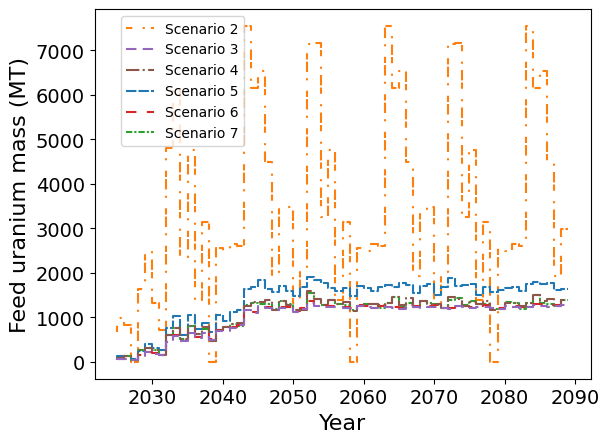

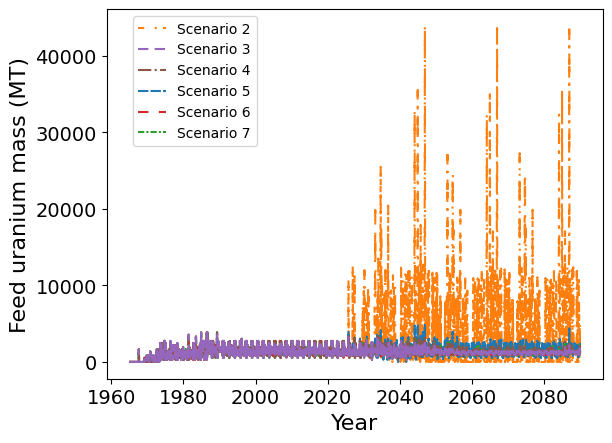

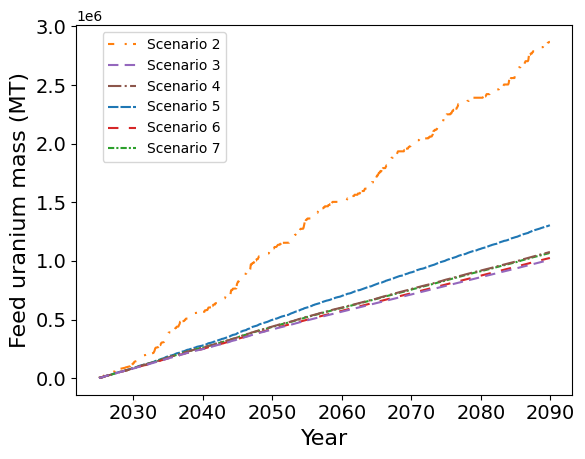

In [35]:
for key in ['s2','s5','s7','s6','s4','s3']:
    AR_feed = feed_nogrowth[key+'_MMR'].copy()
    for reactor in ['Xe-100','VOYGR']:
        AR_feed += feed_nogrowth[key + '_' + reactor]
    counter = 721
    averages = []
    for ii in range(0,65):
        year_data = AR_feed[counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
    ax0 = plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key],
            color=colors[key], linestyle=lines[key]) 
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Feed uranium mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    ax1 = plt.figure(1)
    feed_nogrowth[key+'_total'] = AR_feed + feed_nogrowth[key +'_LWR']
    plt.plot(uranium_to_reactors_nogrowth[key + '_MMR']['Year'], feed_nogrowth[key+'_total']/1000, 
             label=labels[key],
            linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Feed uranium mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    ax2 = plt.figure(2)
    plt.plot(uranium_to_reactors_nogrowth[key+'_MMR']['Year'][721:], feed_nogrowth[key+'_total'][721:].cumsum()/1000, 
             label=labels[key],
            linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Feed uranium mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
order = [0, 5, 4, 1, 3, 2]
handles, legend_labels = ax0.gca().get_legend_handles_labels()
ax0.legend([handles[idx] for idx in order],[legend_labels[idx] for idx in order], bbox_to_anchor=(0.37, 0.88))
ax0.savefig('figures/nogrowth_AR_feed.pdf', bbox_inches='tight')
handles, legend_labels = ax2.gca().get_legend_handles_labels()
ax1.legend([handles[idx] for idx in order],[legend_labels[idx] for idx in order], bbox_to_anchor=(0.37, 0.88))
ax1.savefig('figures/nogrowth_feed.pdf', bbox_inches='tight')
handles, legend_labels = ax2.gca().get_legend_handles_labels()
ax2.legend([handles[idx] for idx in order],[legend_labels[idx] for idx in order], bbox_to_anchor=(0.37, 0.88))
ax2.savefig('figures/nogrowth_feed_cumulative.pdf', bbox_inches='tight')

In [34]:
#Reporting feed masses
for scenario in ['s2','s3','s4','s5','s6','s7']:
    HALEU_feed = feed_nogrowth[scenario+'_MMR'] + feed_nogrowth[scenario+'_Xe-100']
    print('Average feed for HALEU in',scenario, 'after 2025:', HALEU_feed[721:].mean()/1000)
    AR_feed = HALEU_feed + feed_nogrowth[scenario+'_VOYGR']
    print('AR Average mass in', scenario, 'after 2025:', AR_feed[721:].mean()/1000)
    print('AR Maximum mass in', scenario, 'after 2025:', AR_feed[721:].max()/1000)
    print('AR Cumulative mass in', scenario, 'after 2025:', AR_feed[721:].cumsum()[1499]/1000)

Average feed for HALEU in s2 after 2025: 3372.7534831396465
AR Average mass in s2 after 2025: 3372.7534831396465
AR Maximum mass in s2 after 2025: 43612.95704004638
AR Cumulative mass in s2 after 2025: 2627374.9633657867
Average feed for HALEU in s3 after 2025: 986.8975129040849
AR Average mass in s3 after 2025: 986.8975129040849
AR Maximum mass in s3 after 2025: 2709.68020528227
AR Cumulative mass in s3 after 2025: 768793.1625522786
Average feed for HALEU in s4 after 2025: 1073.0262606563265
AR Average mass in s4 after 2025: 1073.0262606563265
AR Maximum mass in s4 after 2025: 2912.0316550822927
AR Cumulative mass in s4 after 2025: 835887.457051281
Average feed for HALEU in s5 after 2025: 122.37088440417077
AR Average mass in s5 after 2025: 1365.5170902010605
AR Maximum mass in s5 after 2025: 4896.1485016032975
AR Cumulative mass in s5 after 2025: 1063737.8132666275
Average feed for HALEU in s6 after 2025: 918.8667614328033
AR Average mass in s6 after 2025: 1007.7287942810843
AR Maxim

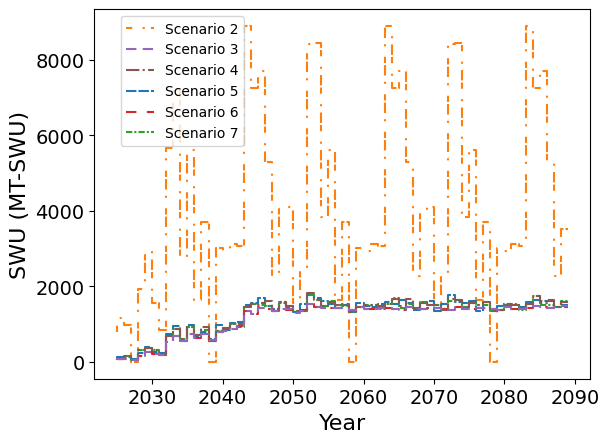

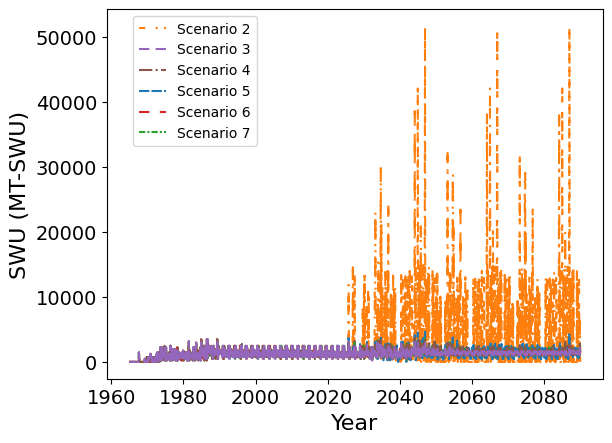

In [36]:
for key in ['s2', 's5', 's7', 's6', 's4', 's3']:
    AR_SWU = SWU_nogrowth[key+'_MMR'].copy()
    for reactor in ['Xe-100','VOYGR']:
        AR_SWU += SWU_nogrowth[key + '_' + reactor]
    counter = 721
    averages = []
    for ii in range(0,65):
        year_data = AR_SWU[counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
    ax0 = plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key],
            color=colors[key], linestyle=lines[key]) 
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('SWU (MT-SWU)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    ax1 = plt.figure(1)
    SWU_nogrowth[key+'_total'] = AR_SWU + SWU_nogrowth[key +'_LWR']
    plt.plot(uranium_to_reactors_nogrowth[key + '_MMR']['Year'], SWU_nogrowth[key+'_total']/1000, label=labels[key],
            linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('SWU (MT-SWU)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
handles, legend_labels = ax0.gca().get_legend_handles_labels()
ax0.legend([handles[idx] for idx in order],[legend_labels[idx] for idx in order], bbox_to_anchor=(0.37, 0.88))
ax0.savefig('figures/nogrowth_AR_SWU.pdf', bbox_inches='tight')
handles, legend_labels = ax1.gca().get_legend_handles_labels()
ax1.legend([handles[idx] for idx in order],[legend_labels[idx] for idx in order], bbox_to_anchor=(0.37, 0.88))
ax1.savefig('figures/nogrowth_SWU.pdf', bbox_inches='tight')

In [37]:
#Reporting SWU Requirements
for scenario in ['s2','s3','s4','s5','s6','s7']:
    HALEU_SWU = SWU_nogrowth[scenario+'_MMR'] + SWU_nogrowth[scenario+'_Xe-100']
    print('Average HALEU SWU in', scenario, 'after 2025:', HALEU_SWU[721:].mean()/1000)
    AR_SWU = HALEU_SWU + SWU_nogrowth[scenario+'_VOYGR']
    print('Average SWU in ', scenario, ':', AR_SWU[721:].mean()/1000)
    print('Maximum SWU in ', scenario, ':', AR_SWU[721:].max()/1000)

Average HALEU SWU in s2 after 2025: 3977.5103106076044
Average SWU in  s2 : 3977.5103106076044
Maximum SWU in  s2 : 51433.04637295622
Average HALEU SWU in s3 after 2025: 1136.2069959807604
Average SWU in  s3 : 1136.2069959807604
Maximum SWU in  s3 : 3119.6325513604975
Average HALEU SWU in s4 after 2025: 1238.8109992379373
Average SWU in  s4 : 1238.8109992379373
Maximum SWU in  s4 : 3359.734837747451
Average HALEU SWU in s5 after 2025: 144.31278682801013
Average SWU in  s5 : 1246.441301038361
Maximum SWU in  s5 : 4549.560571936658
Average HALEU SWU in s6 after 2025: 1057.8837509094042
Average SWU in  s6 : 1136.6656188635498
Maximum SWU in  s6 : 3149.59840073065
Average HALEU SWU in s7 after 2025: 1218.896668489963
Average SWU in  s7 : 1224.9488692326222
Maximum SWU in  s7 : 3359.734837747451


### SNF discharged from reactors

In [38]:
waste_nogrowth = {'s2_MMR':'', 's2_Xe-100':'', 's2_VOYGR':'', 's2_LWR':'', 's2_total':'',
                    's3_MMR':'', 's3_Xe-100':'', 's3_VOYGR':'', 's3_LWR':'', 's3_total':'',
                    's4_MMR':'', 's4_Xe-100':'', 's4_VOYGR':'', 's4_LWR':'', 's4_total':'',
                    's5_MMR':'', 's5_Xe-100':'', 's5_VOYGR':'', 's5_LWR':'', 's5_total':'',
                    's6_MMR':'', 's6_Xe-100':'', 's6_VOYGR':'', 's6_LWR':'', 's6_total':'',
                    's7_MMR':'', 's7_Xe-100':'', 's7_VOYGR':'', 's7_LWR':'', 's7_total':''}
for key in waste_nogrowth:
    scenario = key[:2]
    reactor = key[3:]
    if reactor != 'total':
        waste_nogrowth[key] = dfa.commodity_mass_traded(transactions_nogrowth[scenario], waste_commodity[reactor])

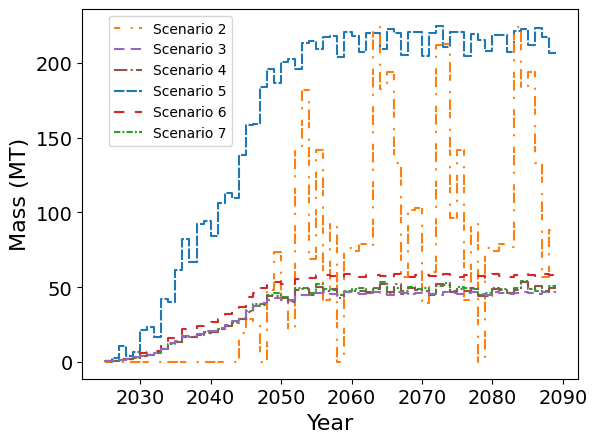

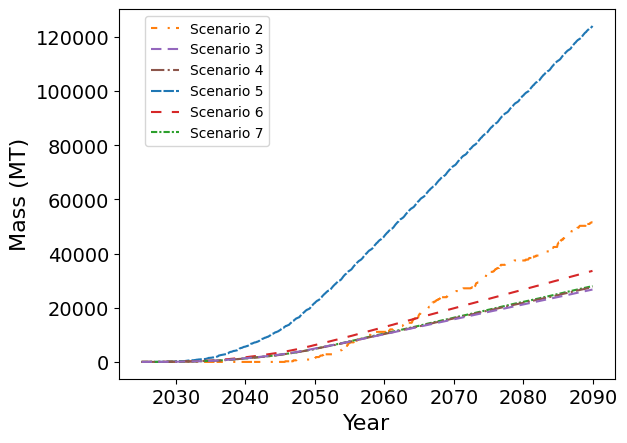

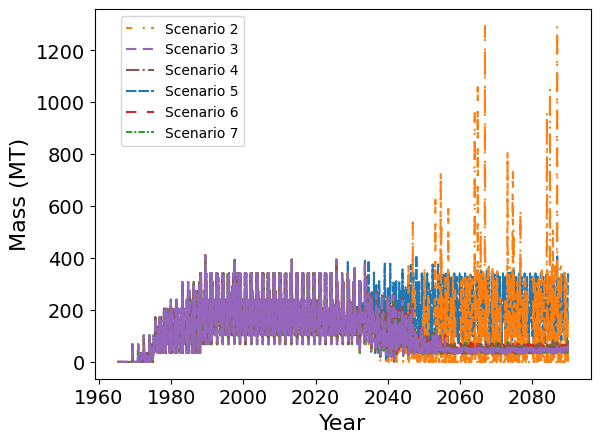

In [39]:
for key in plotting_order_nogrowth:
    AR_waste = waste_nogrowth[key + '_MMR'].copy()
    for reactor in ['Xe-100', 'VOYGR']:
        AR_waste['Quantity'] += waste_nogrowth[key + '_' + reactor]['Quantity']
    counter = 721
    averages = []
    for ii in range(0,65):
        year_data = AR_waste['Quantity'][counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
    ax0 = plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key],
            color=colors[key], linestyle=lines[key]) 
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    ax2 = plt.figure(2)
    plt.plot(AR_waste['Year'][721:], AR_waste['Quantity'][721:].cumsum()/1000, label=labels[key],
            linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    ax1 = plt.figure(1)
    waste_nogrowth[key+'_total'] = AR_waste['Quantity'] + waste_nogrowth[key + '_LWR']['Quantity']
    plt.plot(AR_waste['Year'], waste_nogrowth[key+'_total']/1000, label=labels[key],
            linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    

    
handles, legend_labels = ax0.gca().get_legend_handles_labels()
ax0.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax0.savefig('figures/nogrowth_AR_waste.pdf', bbox_inches='tight')
handles, legend_labels = ax1.gca().get_legend_handles_labels()
ax1.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax1.savefig('figures/nogrowth_waste.pdf', bbox_inches='tight')
handles, legend_labels = ax2.gca().get_legend_handles_labels()
ax2.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax2.savefig('figures/nogrowth_waste_cumulative.pdf', bbox_inches='tight')

In [40]:
#Reporting SNF masses
for scenario in ['s2','s3','s4','s5','s6','s7']:
    HALEU_waste = waste_nogrowth[scenario+'_MMR']['Quantity'] + waste_nogrowth[scenario+'_Xe-100']['Quantity']
    print('Average HALEU waste in', scenario, ': ', HALEU_waste[721:].mean()/1000)
    AR_waste = HALEU_waste + waste_nogrowth[scenario+'_VOYGR']['Quantity']
    print('Average AR waste in', scenario, 'after 2025:', AR_waste[721:].mean()/1000)
    print('Maximum  in', scenario, ':', AR_waste[721:].max()/1000)
    print('Cumulative  in', scenario, ':', AR_waste[721:].cumsum()[1499]/1000)

Average HALEU waste in s2 :  66.18755405391529
Average AR waste in s2 after 2025: 66.18755405391529
Maximum  in s2 : 1293.2328160000002
Cumulative  in s2 : 51560.10460800001
Average HALEU waste in s3 :  34.29024184852374
Average AR waste in s3 after 2025: 34.29024184852374
Maximum  in s3 : 68.13456
Cumulative  in s3 : 26712.098400000086
Average HALEU waste in s4 :  35.436003088575106
Average AR waste in s4 after 2025: 35.436003088575106
Maximum  in s4 : 83.37145600000001
Cumulative  in s4 : 27604.64640599991
Average HALEU waste in s5 :  2.3951485365853658
Average AR waste in s5 after 2025: 159.19991320924262
Maximum  in s5 : 406.294404
Cumulative  in s5 : 124016.73238999992
Average HALEU waste in s6 :  31.92548410783055
Average AR waste in s6 after 2025: 43.14267535301669
Maximum  in s6 : 82.71318000000001
Cumulative  in s6 : 33608.14409999997
Average HALEU waste in s7 :  35.099891355584084
Average AR waste in s7 after 2025: 35.954278107830554
Maximum  in s7 : 83.37145600000001
Cumulat

## 1% Growth Scenarios

In [42]:
out_files_1percent = {'s08_outfile':"../outputs/scenario8.sqlite",
                    's09_outfile':"../outputs/scenario9.sqlite",
            's10_outfile':"../outputs/scenario10.sqlite",
            's11_outfile':"../outputs/scenario11.sqlite",
            's12_outfile':"../outputs/scenario12.sqlite",
            's13_outfile':"../outputs/scenario13.sqlite"}

### Reactors

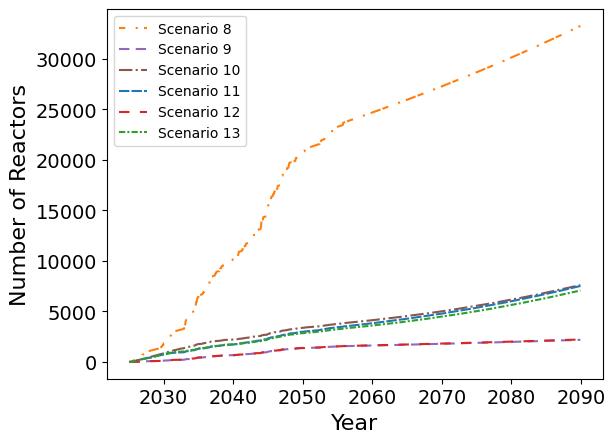

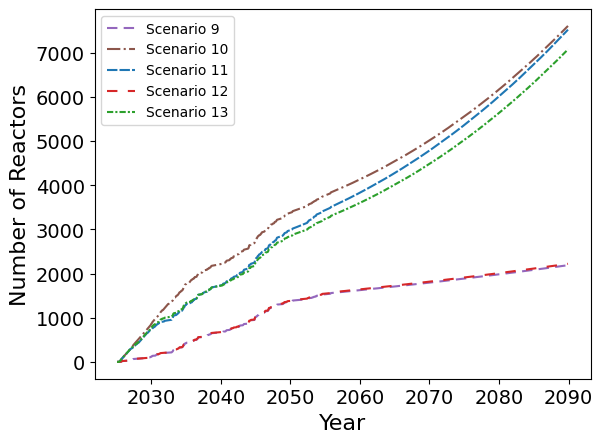

In [43]:
reactors_1percent = {'s08_reactors':"",'s09_reactors':"",
                    's10_reactors':"",'s11_reactors':"",
                    's12_reactors':"",'s13_reactors':""}
plt.figure(0)
for key in reactors_1percent:
    scenario = key[:3]
    reactors_1percent[key] = tm.get_prototype_totals(out_files_1percent[scenario+'_outfile'], non_lwr, adv_rxs)
    plt.plot(reactors_1percent[key]['Year'][721:], reactors_1percent[key]['advrx_total'][721:], 
             label=labels[scenario], color=colors[scenario], linestyle=lines[scenario])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Reactors', fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/1percent_reactors.pdf', bbox_inches='tight')

plt.figure(1)
for key in ['s09_reactors','s10_reactors','s11_reactors','s12_reactors','s13_reactors']:
    scenario = key[:3]
    reactors_1percent[key] = tm.get_prototype_totals(out_files_1percent[scenario+'_outfile'], non_lwr, adv_rxs)
    plt.plot(reactors_1percent[key]['Year'][721:], reactors_1percent[key]['advrx_total'][721:], 
             label=labels[scenario], color=colors[scenario], linestyle=lines[scenario])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Reactors', fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/1percent_reactors_9-13.pdf', bbox_inches='tight')

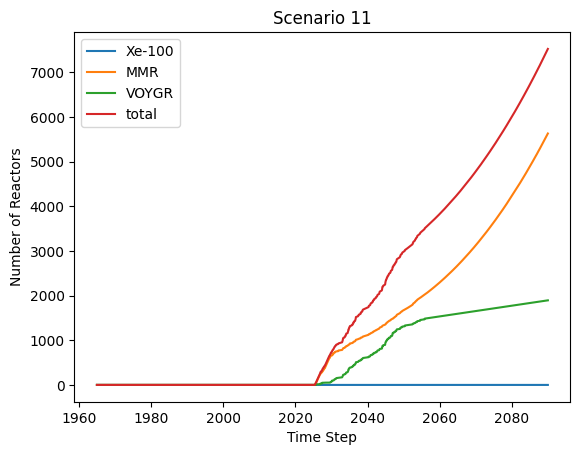

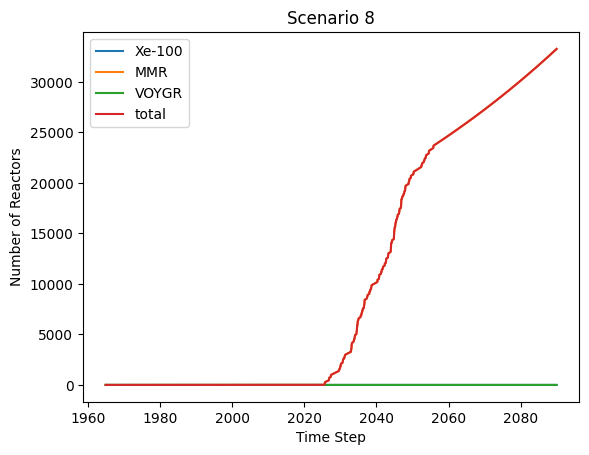

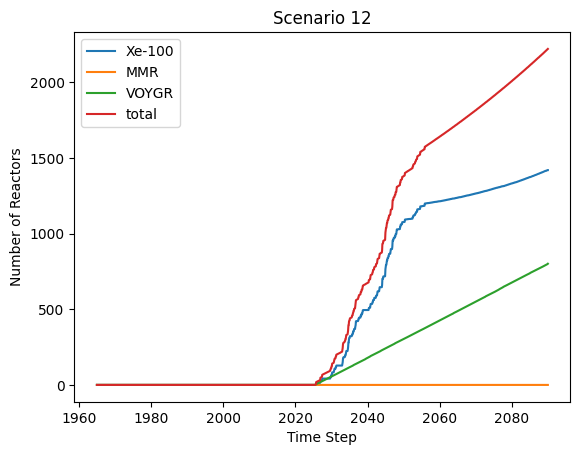

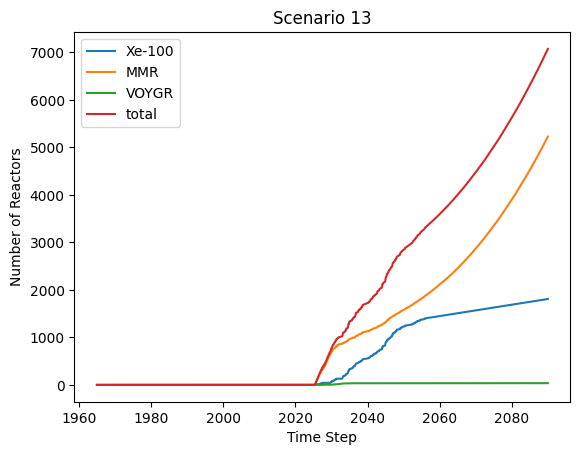

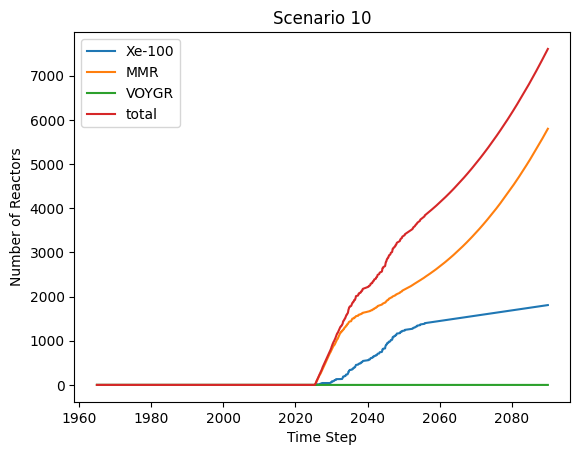

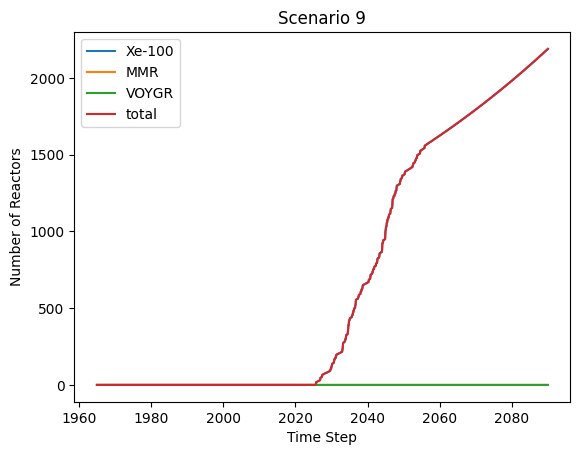

In [44]:
for scenario in plotting_order_1percent:
        plt.figure()
        for reactor in ['Xe-100', 'MMR', 'VOYGR']:
            num_rxs = reactors_1percent[scenario+'_reactors'][reactor+'_total']
            plt.plot(reactors_1percent[scenario+'_reactors']['Year'], num_rxs, label = reactor)
        plt.plot(reactors_1percent[scenario+'_reactors']['Year'], 
                 reactors_1percent[scenario+'_reactors']['advrx_total'], label='total')
        plt.legend()
        plt.title(labels[scenario])
        plt.xlabel('Time Step')
        plt.ylabel('Number of Reactors')

In [45]:
for key in reactors_1percent:
    scenario = key[1:3]
    for adv_rx in adv_rxs:
        print(f'Max {adv_rx} in S{scenario}:', reactors_1percent[key][adv_rx +'_total'].max())
        print(f'Max {adv_rx} added in one step in S{scenario}:', reactors_1percent[key][adv_rx +'_enter'].max())
        prototype_sum = reactors_1percent[key][adv_rx +'_enter'].cumsum()
        print(f'Total number of {adv_rx} deployed in S{scenario}:', prototype_sum.iloc[-1])
    print(f'Max Adv Rx in S{scenario}:', reactors_1percent[key]['advrx_total'].max())
    print(f'Max Adv Rx added in one step in S{scenario}:', reactors_1percent[key]['advrx_enter'].max())
    advrx_sum = reactors_1percent[key]['advrx_enter'].cumsum()
    print(f'Total number of reactors deployed in S{scenario}:', advrx_sum.iloc[-1])  

Max MMR in S08: 33265.0
Max MMR added in one step in S08: 936.0
Total number of MMR deployed in S08: 82964.0
Max Xe-100 in S08: 0.0
Max Xe-100 added in one step in S08: 0.0
Total number of Xe-100 deployed in S08: 0.0
Max VOYGR in S08: 0.0
Max VOYGR added in one step in S08: 0.0
Total number of VOYGR deployed in S08: 0.0
Max Adv Rx in S08: 33265.0
Max Adv Rx added in one step in S08: 936.0
Total number of reactors deployed in S08: 82964.0
Max MMR in S09: 0.0
Max MMR added in one step in S09: 0.0
Total number of MMR deployed in S09: 0.0
Max Xe-100 in S09: 2189.0
Max Xe-100 added in one step in S09: 47.0
Total number of Xe-100 deployed in S09: 2299.0
Max VOYGR in S09: 0.0
Max VOYGR added in one step in S09: 0.0
Total number of VOYGR deployed in S09: 0.0
Max Adv Rx in S09: 2189.0
Max Adv Rx added in one step in S09: 47.0
Total number of reactors deployed in S09: 2299.0
Max MMR in S10: 5798.0
Max MMR added in one step in S10: 49.0
Total number of MMR deployed in S10: 12161.0
Max Xe-100 in S

### Energy

In [66]:
energy_1percent = {'s08_energy':'', 's09_energy':'', 's10_energy':'',
                  's11_energy':'', 's12_energy':'', 's13_energy':''}

In [68]:
for key in ['s08','s09','s10','s11','s12','s13']:
    energy_1percent[key + '_energy'] = tm.get_annual_electricity(out_files_1percent[key + '_outfile'])

s08_energy : -0.4058336333333301 -0.1978644353496577
s09_energy : -0.4243336333333332 -0.22803110201633103
s10_energy : -0.405583633333336 -0.1972811020163192
s11_energy : -0.4058336333333301 -0.1974477686829914
s12_energy : -0.43633363333333364 -0.23198646872410222
s13_energy : -0.405583633333336 -0.1977811020163074


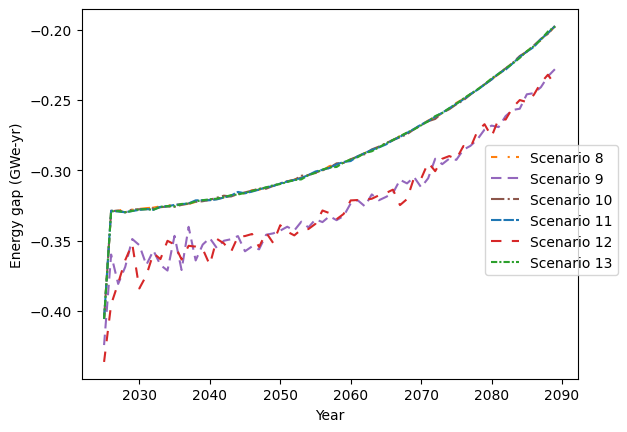

In [74]:
demand = 87.198156* np.exp(0.01*(time-2025))

for key in energy_1percent:
    scenario = key[:3]
    gap = demand-energy_1percent[key]['Energy'][58:]
    plt.figure(1)
    plt.plot(energy_1percent[key]['Year'][58:],gap, color = colors[scenario], linestyle = lines[scenario], 
            label=labels[scenario])
    print(key, ':', gap.min(), gap.max())
plt.xlabel('Year')
plt.ylabel('Energy gap (GWe-yr)')
plt.legend(bbox_to_anchor=(0.8, 0.65))
plt.savefig('figures/1percent_energy_gap.pdf')

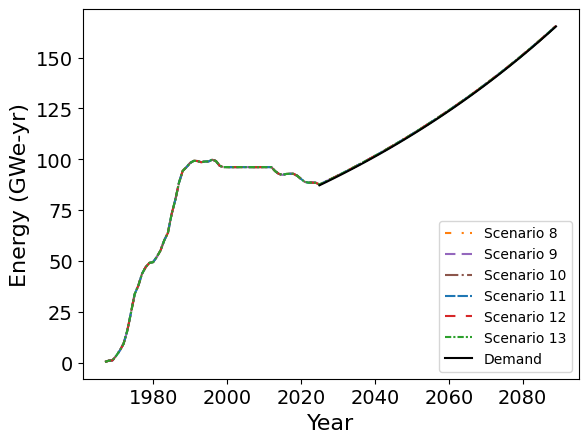

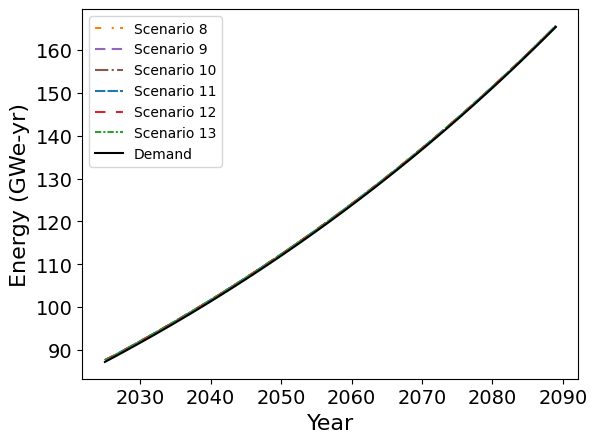

In [75]:
for key in energy_1percent:
    scenario = key[:3]
    plt.figure(0)
    plt.plot(energy_1percent[key]['Year'], energy_1percent[key]['Energy'], label=labels[scenario],
            linestyle=lines[scenario], color=colors[scenario])
    
    plt.figure(1)
    plt.plot(energy_1percent[key]['Year'][58:], energy_1percent[key]['Energy'][58:], label=labels[scenario],
            linestyle=lines[scenario], color=colors[scenario])
plt.figure(0)
plt.plot(np.linspace(2025,2089,65), 87.198156* np.exp(0.01*(time-2025)), 'k', label='Demand')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Energy (GWe-yr)', fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/1percent_energy.pdf', bbox_inches='tight')

plt.figure(1)
plt.plot(np.linspace(2025,2089,65), 87.198156* np.exp(0.01*(time-2025)), 'k', label='Demand')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Energy (GWe-yr)', fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/1percent_energy_after_2025.pdf', bbox_inches='tight')

In [76]:
prototype_energy_1percent = {'s08_MMR':'', 's08_Xe-100':'', 's08_VOYGR':'', 's08_LWR':'',
                            's09_MMR':'', 's09_Xe-100':'', 's09_VOYGR':'', 's09_LWR':'',
                            's10_MMR':'', 's10_Xe-100':'', 's10_VOYGR':'', 's10_LWR':'',
                            's11_MMR':'', 's11_Xe-100':'', 's11_VOYGR':'', 's11_LWR':'',
                            's12_MMR':'', 's12_Xe-100':'', 's12_VOYGR':'', 's12_LWR':'', 
                            's13_MMR':'', 's13_Xe-100':'', 's13_VOYGR':'', 's13_LWR':''}

for scenario in ['s08','s09','s10','s11','s12','s13']:
    for reactor in ['MMR', 'Xe-100','VOYGR']:
        prototype_energy_1percent[scenario + '_' + reactor] = tm.get_prototype_energy(out_files_1percent[scenario +'_outfile'], reactor)
    prototype_energy_1percent[scenario + '_LWR'] = tm.get_lwr_energy(out_files_1percent[scenario +'_outfile'], ['MMR', 'Xe-100','VOYGR'])

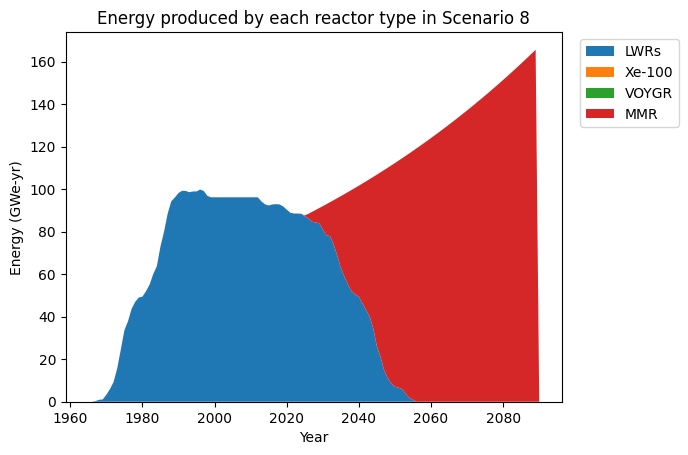

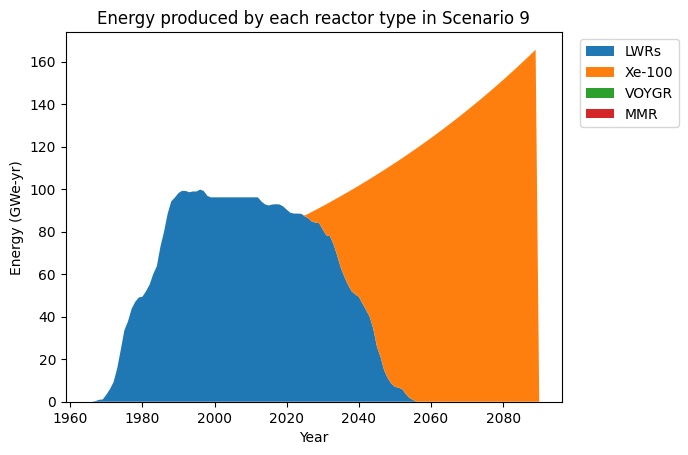

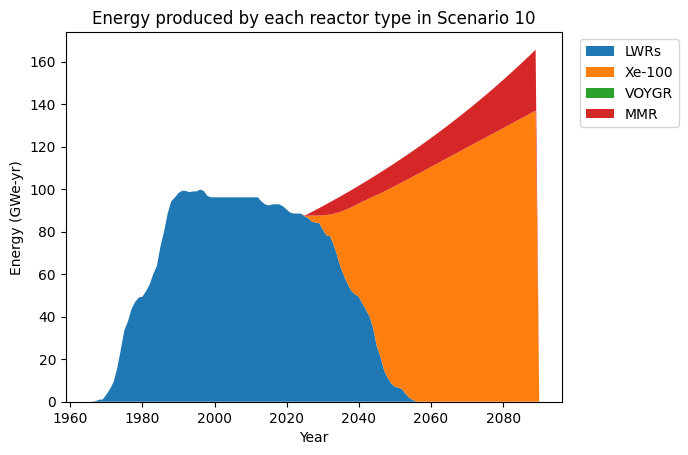

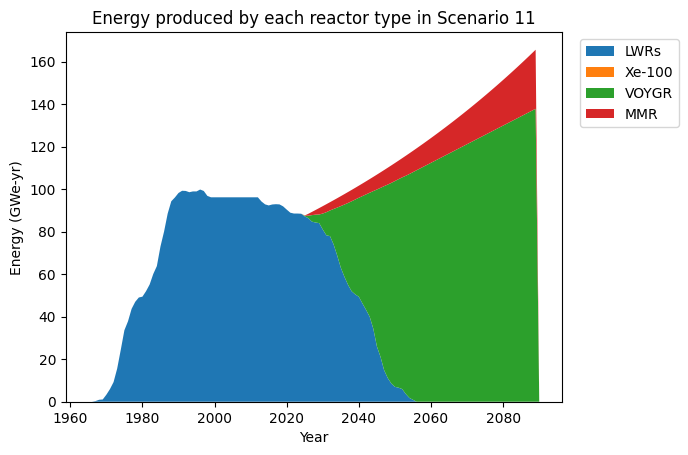

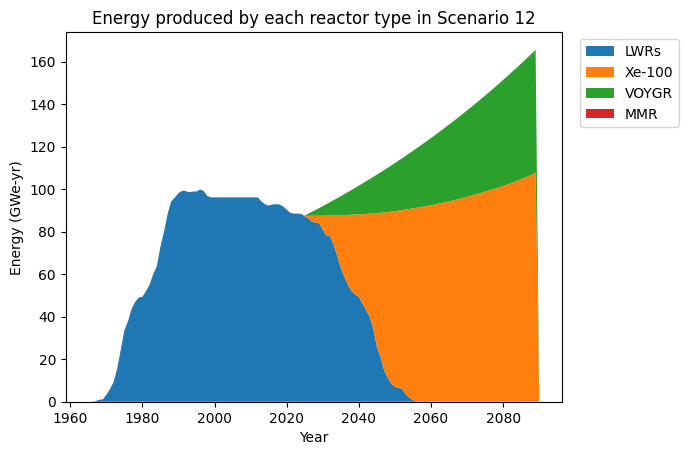

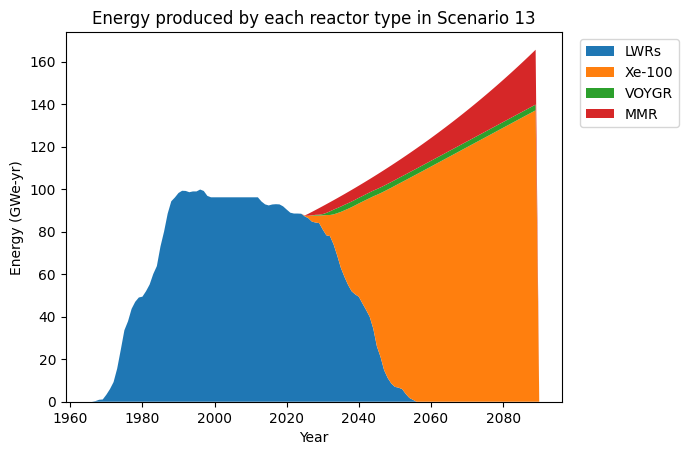

In [77]:
for scenario in ['s08','s09','s10','s11','s12','s13']:
    plt.figure()
    plt.stackplot(prototype_energy_1percent[scenario+'_LWR']['Year'], prototype_energy_1percent[scenario+'_LWR']['Energy'],
                 prototype_energy_1percent[scenario+'_Xe-100']['Energy'], prototype_energy_1percent[scenario+'_VOYGR']['Energy'],
                 prototype_energy_1percent[scenario+'_MMR']['Energy'], labels = ['LWRs','Xe-100','VOYGR','MMR'])
    plt.xlabel('Year')
    plt.ylabel('Energy (GWe-yr)')
    plt.title(f'Energy produced by each reactor type in {labels[scenario]}')
    plt.legend(bbox_to_anchor=(1.25, 1))
    plt.savefig(f'figures/prototype_energy_{scenario}.png', bbox_inches='tight')

### Fuel mass

In [47]:
transactions_1percent = {'s08':'', 's09':'', 's10':'','s11':'', 's12':'','s13':''}

for scenario in transactions_1percent:
    transactions_1percent[scenario] = tm.add_receiver_prototype(out_files_1percent[scenario + '_outfile'])

In [48]:
#Dividing fuel mass by prototype
uranium_to_reactors_1percent = {'s08_MMR':'', 's08_Xe-100':'', 's08_VOYGR':'', 's08_LWR':'', 's08_total':'',
                       's09_MMR':'', 's09_Xe-100':'', 's09_VOYGR':'', 's09_LWR':'', 's09_total':'',
                       's10_MMR':'', 's10_Xe-100':'', 's10_VOYGR':'', 's10_LWR':'', 's10_total':'',
                       's11_MMR':'', 's11_Xe-100':'', 's11_VOYGR':'', 's11_LWR':'', 's11_total':'',
                       's12_MMR':'', 's12_Xe-100':'', 's12_VOYGR':'', 's12_LWR':'', 's12_total':'',
                       's13_MMR':'', 's13_Xe-100':'', 's13_VOYGR':'', 's13_LWR':'', 's13_total':'',}

for key in uranium_to_reactors_1percent:
    scenario = key[:3]
    reactor = key[4:]
    if reactor == 'LWR':
        uranium_to_reactors_1percent[key] = dfa.commodity_to_LWR(transactions_1percent[scenario], 
                                                        'fresh_uox', adv_rxs)
    elif reactor != 'total': 
        uranium_to_reactors_1percent[key] = dfa.commodity_to_prototype(transactions_1percent[scenario], 
                                                        uox_commodity[reactor], reactor)
        uranium_to_reactors_1percent[key]['Quantity'] = uranium_to_reactors_1percent[key]['Quantity']*uranium_fractions[reactor]

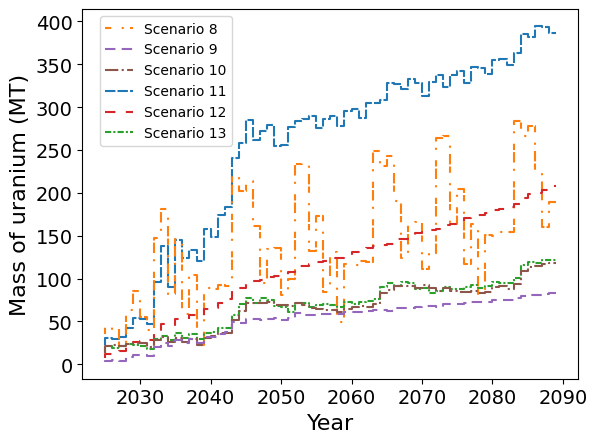

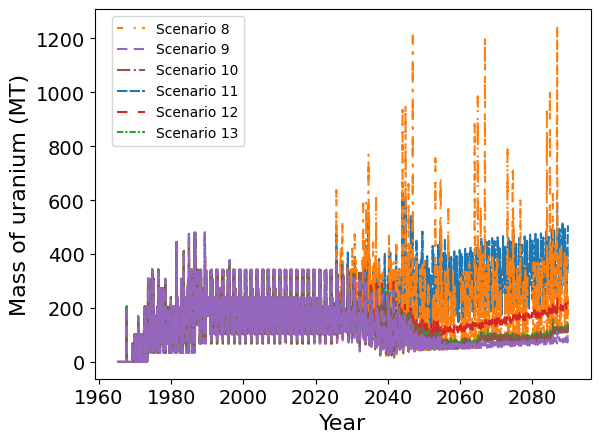

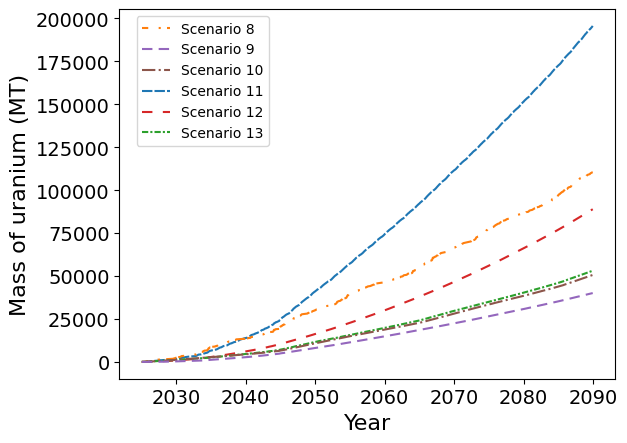

In [49]:
for key in plotting_order_1percent:

    ax1 = plt.figure(1)
    AR_uranium = uranium_to_reactors_1percent[key + '_MMR'].copy()
    for reactor in ['Xe-100', 'VOYGR']:
        AR_uranium['Quantity'] += uranium_to_reactors_1percent[key+'_'+reactor]['Quantity']
    counter = 721
    averages = []
    for ii in range(0,65):
        year_data = AR_uranium['Quantity'][counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key],
            color=colors[key], linestyle=lines[key]) 
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass of uranium (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('', bbox_inches='tight')

    ax2 = plt.figure(2)
    uranium_to_reactors_1percent[key+'_total'] = AR_uranium['Quantity'] + \
                                                uranium_to_reactors_1percent[key+'_LWR']['Quantity']
    plt.plot(AR_uranium['Year'], uranium_to_reactors_1percent[key+'_total']/1000, label=labels[key],
            linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass of uranium (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('', bbox_inches='tight')
    
    ax3 = plt.figure(3)
    plt.plot(AR_uranium['Year'][721:], AR_uranium['Quantity'][721:].cumsum()/1000, 
             label=labels[key], linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass of uranium (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

handles, legend_labels = ax1.gca().get_legend_handles_labels()
ax1.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax1.savefig('figures/1percent_AR_uranium.pdf', bbox_inches='tight')
handles, legend_labels = ax2.gca().get_legend_handles_labels()
ax2.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax2.savefig('figures/1percent_uranium.pdf', bbox_inches='tight')
handles, legend_labels = ax3.gca().get_legend_handles_labels()
ax3.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax3.savefig('figures/1percent_uranium_cumulative.pdf', bbox_inches='tight')

In [50]:
#Reporting uranium masses
for scenario in ['s08','s09','s10','s11','s12','s13']:
    HALEU_mass = uranium_to_reactors_1percent[scenario+'_MMR']['Quantity'] + \
                uranium_to_reactors_1percent[scenario+'_Xe-100']['Quantity']
    print('Average HALEU mass in', scenario,'after 2025:', HALEU_mass[721:].mean()/1000)
    AR_mass = HALEU_mass + uranium_to_reactors_1percent[scenario+'_VOYGR']['Quantity']
    print('Average mass in ', scenario, ':', AR_mass[721:].mean()/1000)
    print('Maximum mass in ', scenario, ':', AR_mass[721:].max()/1000) 
    print('Cumulative mass in ', scenario, ':', AR_mass[721:].cumsum()[1499]/1000)    

Average HALEU mass in s08 after 2025: 141.83000967642056
Average mass in  s08 : 141.83000967642056
Maximum mass in  s08 : 1246.4984882057759
Cumulative mass in  s08 : 110485.5775379317
Average HALEU mass in s09 after 2025: 51.47195263847984
Average mass in  s09 : 51.47195263847984
Maximum mass in  s09 : 112.49972253
Cumulative mass in  s09 : 40096.651105375815
Average HALEU mass in s10 after 2025: 65.01100549270376
Average mass in  s10 : 65.01100549270376
Maximum mass in  s10 : 145.600670874306
Cumulative mass in  s10 : 50643.57327881617
Average HALEU mass in s11 after 2025: 18.929700799708367
Average mass in  s11 : 251.14938741523295
Maximum mass in  s11 : 606.247194500838
Cumulative mass in  s11 : 195645.3727964667
Average HALEU mass in s12 after 2025: 36.42513480780924
Average mass in  s12 : 114.1344668621541
Maximum mass in  s12 : 237.71809733862
Cumulative mass in  s12 : 88910.74968561798
Average HALEU mass in s13 after 2025: 61.984434106759124
Average mass in  s13 : 68.1883538040

### SWU Calculations

In [51]:
tails_1percent = {'s08_MMR':'', 's08_Xe-100':'', 's08_VOYGR':'', 's08_LWR':'',
                       's09_MMR':'', 's09_Xe-100':'', 's09_VOYGR':'', 's09_LWR':'',
                       's10_MMR':'', 's10_Xe-100':'', 's10_VOYGR':'', 's10_LWR':'',
                       's11_MMR':'', 's11_Xe-100':'', 's11_VOYGR':'', 's11_LWR':'',
                       's12_MMR':'', 's12_Xe-100':'', 's12_VOYGR':'', 's12_LWR':'',
                       's13_MMR':'', 's13_Xe-100':'', 's13_VOYGR':'', 's13_LWR':''}

feed_1percent = {'s08_MMR':'', 's08_Xe-100':'', 's08_VOYGR':'', 's08_LWR':'', 's08_total':'',
                       's09_MMR':'', 's09_Xe-100':'', 's09_VOYGR':'', 's09_LWR':'', 's09_total':'',
                       's10_MMR':'', 's10_Xe-100':'', 's10_VOYGR':'', 's10_LWR':'', 's10_total':'',
                       's11_MMR':'', 's11_Xe-100':'', 's11_VOYGR':'', 's11_LWR':'', 's11_total':'',
                       's12_MMR':'', 's12_Xe-100':'', 's12_VOYGR':'', 's12_LWR':'', 's12_total':'',
                       's13_MMR':'', 's13_Xe-100':'', 's13_VOYGR':'', 's13_LWR':'', 's13_total':'',}

SWU_1percent = {'s08_MMR':'', 's08_Xe-100':'', 's08_VOYGR':'', 's08_LWR':'', 's08_total':'',
                       's09_MMR':'', 's09_Xe-100':'', 's09_VOYGR':'', 's09_LWR':'', 's09_total':'',
                       's10_MMR':'', 's10_Xe-100':'', 's10_VOYGR':'', 's10_LWR':'', 's10_total':'',
                       's11_MMR':'', 's11_Xe-100':'', 's11_VOYGR':'', 's11_LWR':'', 's11_total':'',
                       's12_MMR':'', 's12_Xe-100':'', 's12_VOYGR':'', 's12_LWR':'', 's12_total':'',
                       's13_MMR':'', 's13_Xe-100':'', 's13_VOYGR':'', 's13_LWR':'', 's13_total':'',}
for key in feed_1percent:
    scenario = key[:3]
    reactor = key[4:]
    if reactor != 'total':
        tails_1percent[key] = dfa.calculate_tails(uranium_to_reactors_1percent[key]['Quantity'], 
                                    assays[reactor], assays['tails'], assays['feed'])
        feed_1percent[key] = dfa.calculate_feed(uranium_to_reactors_1percent[key]['Quantity'], 
                                           tails_1percent[key])
        SWU_1percent[key] = dfa.calculate_SWU(uranium_to_reactors_1percent[key]['Quantity'],
                                assays[reactor], tails_1percent[key], assays['tails'],
                                feed_1percent[key], assays['feed'])

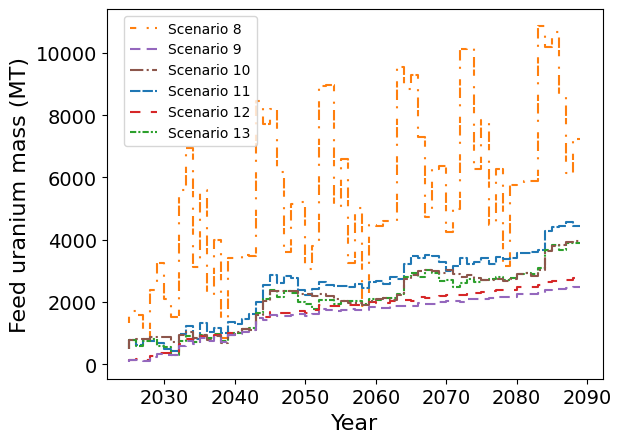

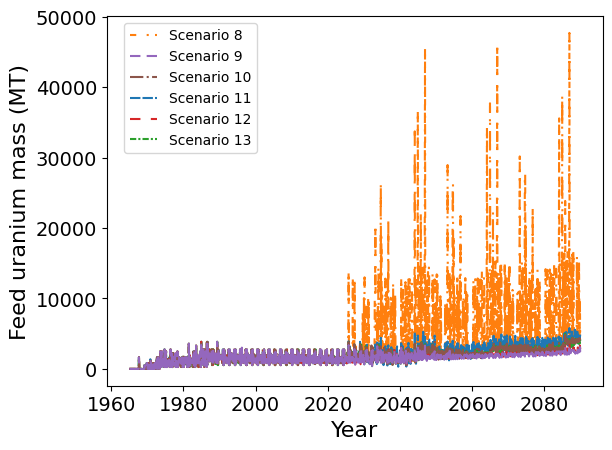

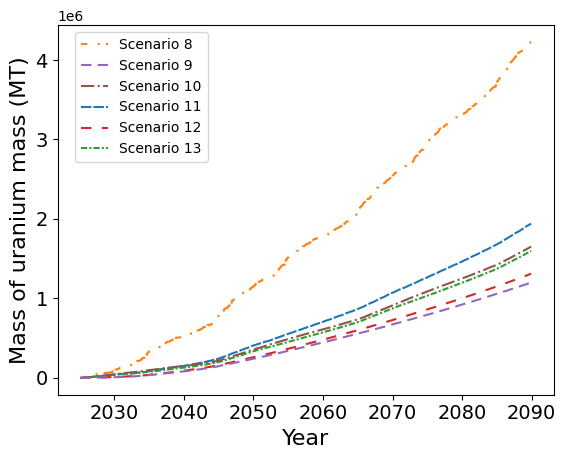

In [60]:
for key in ['s08','s11','s13','s12','s10','s09']:
    AR_feed = feed_1percent[key+'_MMR'].copy()
    for reactor in ['Xe-100','VOYGR']:
        AR_feed += feed_1percent[key + '_' + reactor]
    counter = 721
    averages = []
    for ii in range(0,65):
        year_data = AR_feed[counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
    ax0 = plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key],
            color=colors[key], linestyle=lines[key]) 
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Feed uranium mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    ax1 = plt.figure(1)
    feed_1percent[key+'_total'] = AR_feed + feed_1percent[key +'_LWR']
    plt.plot(uranium_to_reactors_1percent[key + '_MMR']['Year'], feed_1percent[key+'_total']/1000, 
             label=labels[key], linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Feed uranium mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    ax2 = plt.figure(2)
    plt.plot(uranium_to_reactors_1percent[key+'_MMR']['Year'][721:], AR_feed[721:].cumsum()/1000, 
             label=labels[key], linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass of uranium mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
order = [0, 5, 4, 1, 3, 2]
handles, legend_labels = ax0.gca().get_legend_handles_labels()
ax0.legend([handles[idx] for idx in order],[legend_labels[idx] for idx in order], bbox_to_anchor=(0.37, 0.88))
ax0.savefig('figures/1percent_AR_feed.pdf', bbox_inches='tight')
handles, legend_labels = ax1.gca().get_legend_handles_labels()
ax1.legend([handles[idx] for idx in order],[legend_labels[idx] for idx in order], bbox_to_anchor=(0.37, 0.88))
ax1.savefig('figures/1percent_feed.pdf', bbox_inches='tight')
handles, legend_labels = ax2.gca().get_legend_handles_labels()
ax2.legend([handles[idx] for idx in order],[legend_labels[idx] for idx in order], bbox_to_anchor=(0.37, 0.88))
ax2.savefig('figures/1percent_feed_cumulative.pdf', bbox_inches='tight')

In [53]:
#Reporting feed masses
for scenario in ['s08','s09','s10','s11','s12','s13']:
    HALEU_feed = feed_1percent[scenario+'_MMR']+feed_1percent[scenario+'_Xe-100']
    print('Average HALEU feed in',scenario,'after 2025:', HALEU_feed[721:].mean()/1000)
    AR_feed = HALEU_feed + feed_1percent[scenario+'_VOYGR']
    print('Average mass in ', scenario, ':', AR_feed[721:].mean()/1000)
    print('Maximum mass in ', scenario, ':', AR_feed[721:].max()/1000)
    print('Cumulative mass in ', scenario, ':', AR_feed[721:].cumsum()[1499]/1000)

Average HALEU feed in s08 after 2025: 5426.177473921765
Average mass in  s08 : 5426.177473921765
Maximum mass in  s08 : 47688.934333508645
Cumulative mass in  s08 : 4226992.252185057
Average HALEU feed in s09 after 2025: 1541.1367424045823
Average mass in  s09 : 1541.1367424045823
Maximum mass in  s09 : 3368.3869955166338
Cumulative mass in  s09 : 1200545.5223331715
Average HALEU feed in s10 after 2025: 2119.421742705219
Average mass in  s10 : 2119.421742705219
Maximum mass in  s10 : 4813.589177050651
Cumulative mass in  s10 : 1651029.5375673668
Average HALEU feed in s11 after 2025: 724.2184943919738
Average mass in  s11 : 2491.9965392733643
Maximum mass in  s11 : 5801.178095224632
Cumulative mass in  s11 : 1941265.304093949
Average HALEU feed in s12 after 2025: 1090.6155823081826
Average mass in  s12 : 1682.1797734850938
Maximum mass in  s12 : 3679.6644653350713
Cumulative mass in  s12 : 1310418.0435448892
Average HALEU feed in s13 after 2025: 2003.237853207535
Average mass in  s13 : 

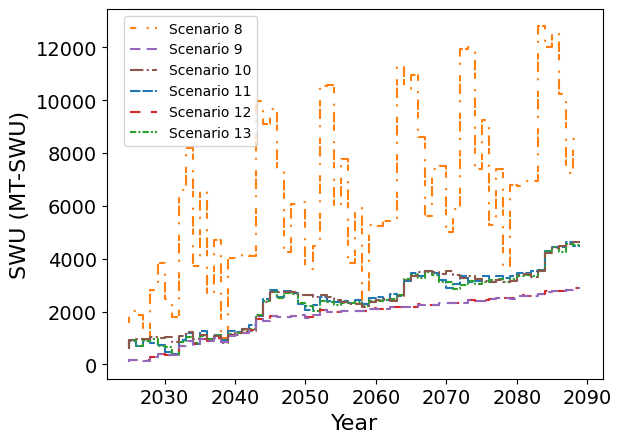

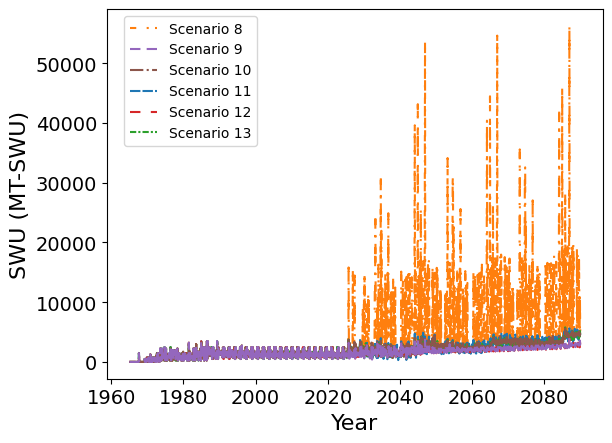

In [54]:
for key in ['s08','s11', 's13','s12','s10','s09']:
    AR_SWU = SWU_1percent[key+'_MMR'].copy()
    for reactor in ['Xe-100','VOYGR']:
        AR_SWU += SWU_1percent[key + '_' + reactor]
    counter = 721
    averages = []
    for ii in range(0,65):
        year_data = AR_SWU[counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
    ax0 = plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key],
            color=colors[key], linestyle=lines[key]) 
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('SWU (MT-SWU)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    ax1 = plt.figure(1)
    SWU_1percent[key+'_total'] = AR_SWU + SWU_1percent[key +'_LWR']
    plt.plot(uranium_to_reactors_1percent[key + '_MMR']['Year'], SWU_1percent[key+'_total']/1000, 
             label=labels[key], linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('SWU (MT-SWU)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
order = [0, 5, 4, 1, 3,2]
handles, legend_labels = ax0.gca().get_legend_handles_labels()
ax0.legend([handles[idx] for idx in order],[legend_labels[idx] for idx in order], bbox_to_anchor=(0.37, 0.88))
ax0.savefig('figures/1percent_AR_SWU.pdf', bbox_inches='tight')
handles, legend_labels = ax1.gca().get_legend_handles_labels()
ax1.legend([handles[idx] for idx in order],[legend_labels[idx] for idx in order], bbox_to_anchor=(0.37, 0.88))
ax1.savefig('figures/1percent_SWU.pdf', bbox_inches='tight')

In [56]:
#Reporting SWU requirements
for scenario in ['s08','s09','s10','s11','s12','s13']:
    HALEU_SWU = SWU_1percent[scenario+'_MMR'] + SWU_1percent[scenario+'_Xe-100']
    print('Average SWU for HALEU in', scenario, 'after 2025:', HALEU_SWU[721:].mean()/1000)
    AR_SWU = HALEU_SWU + SWU_1percent[scenario+'_VOYGR']
    print('Average capacity in ', scenario, ':', AR_SWU[721:].mean()/1000)
    print('Maximum capacity in ', scenario, ':', AR_SWU[721:].max()/1000)   

Average SWU for HALEU in s08 after 2025: 6399.126695028878
Average capacity in  s08 : 6399.126695028878
Maximum capacity in  s08 : 56239.87313678381
Average SWU for HALEU in s09 after 2025: 1774.29806599712
Average capacity in  s09 : 1774.29806599712
Maximum capacity in  s09 : 3877.996265503375
Average SWU for HALEU in s10 after 2025: 2462.3551745974396
Average capacity in  s10 : 2462.3551745974396
Maximum capacity in  s10 : 5600.366806779979
Average SWU for HALEU in s11 after 2025: 854.075621884851
Average capacity in  s11 : 2421.3237709550417
Maximum capacity in  s11 : 5605.484780123698
Average SWU for HALEU in s12 after 2025: 1255.6167568988706
Average capacity in  s12 : 1780.0761970207345
Maximum capacity in  s12 : 3926.0831903364005
Average SWU for HALEU in s13 after 2025: 2325.299180497788
Average capacity in  s13 : 2367.1693673208692
Maximum capacity in  s13 : 5784.559728926757


### SNF discharged from reactors

In [57]:
waste_1percent = {'s08_MMR':'', 's08_Xe-100':'', 's08_VOYGR':'', 's08_LWR':'', 's08_total':'',
                       's09_MMR':'', 's09_Xe-100':'', 's09_VOYGR':'', 's09_LWR':'', 's09_total':'',
                       's10_MMR':'', 's10_Xe-100':'', 's10_VOYGR':'', 's10_LWR':'', 's10_total':'',
                       's11_MMR':'', 's11_Xe-100':'', 's11_VOYGR':'', 's11_LWR':'', 's11_total':'',
                       's12_MMR':'', 's12_Xe-100':'', 's12_VOYGR':'', 's12_LWR':'', 's12_total':'',
                       's13_MMR':'', 's13_Xe-100':'', 's13_VOYGR':'', 's13_LWR':'', 's13_total':'',}

for key in waste_1percent:
    scenario = key[:3]
    reactor = key[4:]
    if reactor != 'total':
        waste_1percent[key] = dfa.commodity_mass_traded(transactions_1percent[scenario], waste_commodity[reactor])

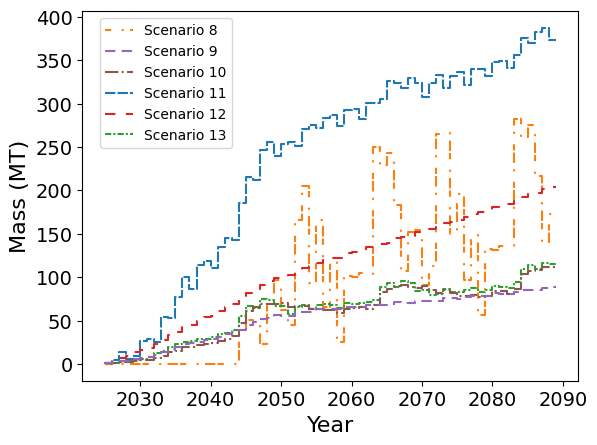

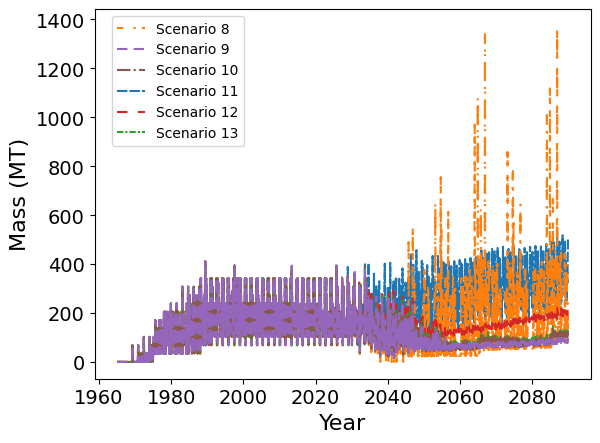

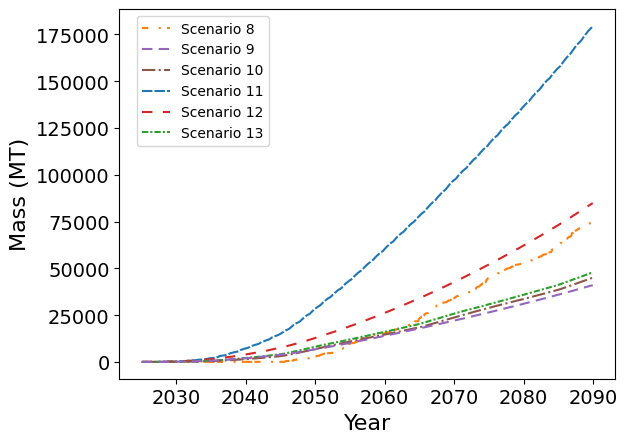

In [58]:
for key in plotting_order_1percent:
    AR_waste = waste_1percent[key + '_MMR'].copy()
    for reactor in ['Xe-100', 'VOYGR']:
        AR_waste['Quantity'] += waste_1percent[key + '_' + reactor]['Quantity']
    counter = 721
    averages = []
    for ii in range(0,65):
        year_data = AR_waste['Quantity'][counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
    ax0 = plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key],
            color=colors[key], linestyle=lines[key]) 
       
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    ax1 = plt.figure(1)
    waste_1percent[key+'_total'] = AR_waste['Quantity'] + waste_1percent[key + '_LWR']['Quantity']
    plt.plot(AR_waste['Year'], waste_1percent[key+'_total']/1000, label=labels[key],
            linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    ax2 = plt.figure(2)
    plt.plot(AR_waste['Year'][721:], AR_waste['Quantity'][721:].cumsum()/1000, label=labels[key],
            linestyle=lines[key], color=colors[key])
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Mass (MT)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
handles, legend_labels = ax0.gca().get_legend_handles_labels()
ax0.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax0.savefig('figures/1percent_AR_waste.pdf', bbox_inches='tight')
handles, legend_labels = ax1.gca().get_legend_handles_labels()
ax1.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax1.savefig('figures/1percent_waste.pdf', bbox_inches='tight')
handles, legend_labels = ax2.gca().get_legend_handles_labels()
ax2.legend([handles[idx] for idx in legend_order],[legend_labels[idx] for idx in legend_order], bbox_to_anchor=(0.37, 0.88))
ax2.savefig('figures/1percent_waste_cumulative.pdf', bbox_inches='tight')

In [59]:
#Reporting waste masses
for scenario in ['s08','s09','s10','s11','s12','s13']:
    HALEU_waste = waste_1percent[scenario+'_MMR']['Quantity'] + waste_1percent[scenario+'_Xe-100']['Quantity']
    print('Average HALEU waste in',scenario,'after 2025:', HALEU_waste[721:].mean()/1000)
    AR_waste = HALEU_waste + waste_1percent[scenario+'_VOYGR']['Quantity']
    print('Average mass in ', scenario, ':', AR_waste[721:].mean()/1000)
    print('Maximum mass in ', scenario, ':', AR_waste[721:].max()/1000)
    print('Cumulative mass in ', scenario, ':', AR_waste[721:].cumsum()[1499]/1000)

Average HALEU waste in s08 after 2025: 96.38581953016688
Average mass in  s08 : 96.38581953016688
Maximum mass in  s08 : 1373.3044740000003
Cumulative mass in  s08 : 75084.55341399995
Average HALEU waste in s09 after 2025: 52.66595445442876
Average mass in  s09 : 52.66595445442876
Maximum mass in  s09 : 108.90360000000001
Cumulative mass in  s09 : 41026.77851999998
Average HALEU waste in s10 after 2025: 57.78513483697048
Average mass in  s10 : 57.78513483697048
Maximum mass in  s10 : 133.56341999999998
Cumulative mass in  s10 : 45014.62003800005
Average HALEU waste in s11 after 2025: 10.561926259306803
Average mass in  s11 : 230.46768664441592
Maximum mass in  s11 : 533.123254
Cumulative mass in  s11 : 179534.327896
Average HALEU waste in s12 after 2025: 37.57014685494224
Average mass in  s12 : 108.96067771501924
Maximum mass in  s12 : 226.93206
Cumulative mass in  s12 : 84880.36794000003
Average HALEU waste in s13 after 2025: 55.45195408215662
Average mass in  s13 : 61.46879213093709


## Comparing DI to MI for Scenario 7
This sections comapres the number of advanced reactors deployed and the energy 
production when using a DeployInst (DI) and a ManagerInst (MI) to deploy 
the advanced reactors

In [19]:
files = {'DI':"../outputs/scenario7_di.sqlite",
         'MI':"../outputs/scenario7_MI.sqlite"}

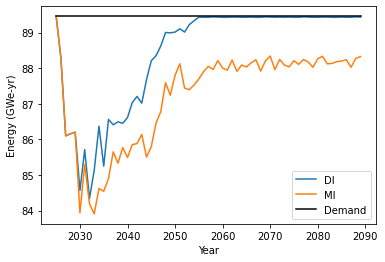

In [20]:
for file in files:
    energy = tm.get_annual_electricity(files[file])
    plt.plot(energy['Year'][58:], energy['Energy'][58:], label=file)
plt.plot(time, np.repeat(89.456, 65), 'k',label='Demand')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Energy (GWe-yr)')
plt.savefig('figures/s7_di_energy.png')
#Using the DI better meets the energy demand

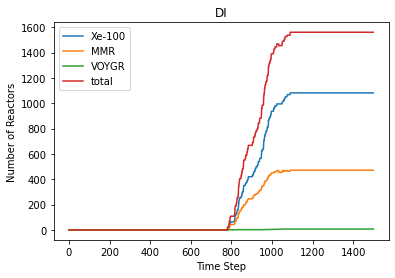

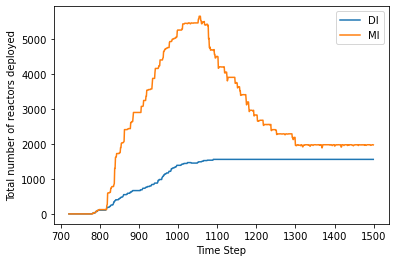

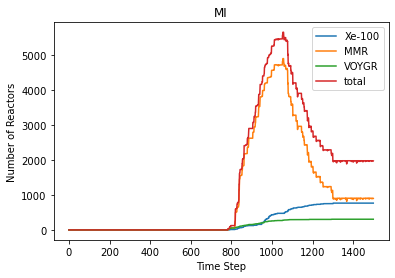

In [24]:
for file in files:
    reactors = tm.get_prototype_totals(files[file], non_lwr, adv_rxs)
    plt.figure(0)
    plt.plot(np.linspace(721, 1499, 779), reactors['advrx_total'][721:], 
             label= file)
    plt.legend()
    plt.xlabel('Time Step')
    plt.ylabel('Total number of reactors deployed')
    plt.figure()
    for reactor in ['Xe-100', 'MMR', 'VOYGR']:
        num_rxs = reactors[reactor+'_total']
        plt.plot(num_rxs, label = reactor)
    plt.plot(reactors['advrx_total'], label='total')
    plt.legend()
    plt.title(file)
    plt.xlabel('Time Step')
    plt.ylabel('Number of Reactors')
    plt.savefig(f'figures/s7_{file}.png')
# The DI deploys fewer reactors over all and fewer MMRs, which makes sense as the MMR has the 
# smallest power output of the advanced reactors

### Compare use of capacity factors

In [157]:
no_outages_file = "../outputs/mmr_voygr_CF.sqlite"
no_outages_energy = tm.get_annual_electricity(no_outages_file)

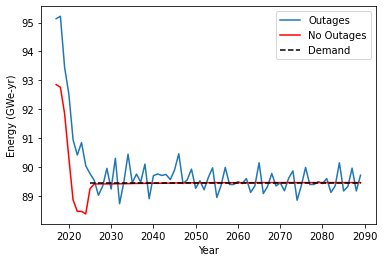

In [166]:
plt.plot(energy_nogrowth['s5_energy']['Year'][50:], energy_nogrowth['s5_energy']['Energy'][50:],label='Outages')
plt.plot(no_outages_energy['Year'][50:], no_outages_energy['Energy'][50:], 'r',label='No Outages')
plt.plot(np.linspace(2025, 2089, 65), np.repeat(89.456, 65), 'k--', label='Demand')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-yr)')
plt.legend()
plt.savefig('figures/compare_CF.png')